## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Project Assignment : Featurazation & Model Tuning

## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Domain:  Cement Manufacturing

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Context:
<font color=darkblue>Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Attribute Information:
<font color=darkblue>
<b>Cement :</b> measured in kg in a m3 mixture
<br><b>Blast :</b> measured in kg in a m3 mixture
<br><b>Fly ash :</b> measured in kg in a m3 mixture
<br><b>Water :</b> measured in kg in a m3 mixture
<br><b>Superplasticizer :</b> measured in kg in a m3 mixture
<br><b>Coarse Aggregate :</b> measured in kg in a m3 mixture
<br><b>Fine Aggregate :</b> measured in kg in a m3 mixture
<br><b>Age :</b> day (1~365)
<br><b>Strength :</b> Concrete compressive strength measured in MPa
</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Learning Outcomes:
<font color=darkblue>
<ul>
<li>Exploratory Data Analysis</li>
<li>Building ML models for Regression</li>
<li>Hyper Parameter Tuning</li>
</ul>
</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Objective:
<font color=darkblue>Modeling of strength of high performance concrete using Machine Learning</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Import the necessary libraries

In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.pipeline import Pipeline
from sklearn.utils import resample

import statsmodels.api as sm
from scipy import stats
from scipy.stats import zscore
#from scipy.stats import pearsonr

import os

import warnings
warnings.filterwarnings('ignore')

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Read the data

In [177]:
concrete_df = pd.read_csv("concrete.csv")
concrete_df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [178]:
concrete_df.tail(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1020,183.9,122.6,0.0,203.5,0.0,959.2,800.0,7,10.79
1021,203.5,305.3,0.0,203.5,0.0,963.4,630.0,3,9.56
1022,144.8,0.0,133.6,180.8,11.1,979.5,811.5,28,13.20
1023,141.3,212.0,0.0,203.5,0.0,971.8,748.5,7,10.39
1024,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,3,21.91
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [179]:
concrete_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<b>Target Variable :</b>
<br><b>Strength :</b> Concrete compressive strength measured in MPa

<b>Numerical Columns :</b> 
<br><b>Cement :</b> measured in kg in a m3 mixture
<br><b>Blast :</b> measured in kg in a m3 mixture
<br><b>Fly ash :</b> measured in kg in a m3 mixture
<br><b>Water :</b> measured in kg in a m3 mixture
<br><b>Superplasticizer :</b> measured in kg in a m3 mixture
<br><b>Coarse Aggregate :</b> measured in kg in a m3 mixture
<br><b>Fine Aggregate :</b> measured in kg in a m3 mixture
<br><b>Age :</b> day (1~365)
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Shape of Data :
<font color=darkblue>
</font>

In [180]:
concrete_df.shape

(1030, 9)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
The dataset has 1030 rows and 9 columns. 
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Checking presence of Missing Values :
<font color=darkblue>
</font>

In [181]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Dataset has no missing values in any of the columns
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Checking presence of Missing Values :
<font color=darkblue>
</font>

In [182]:
concrete_df.isnull().values.any()

False

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Dataset has no missing values in any of the columns
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Unique Check :
<font color=darkblue>
</font>

In [183]:
concrete_df.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [184]:
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
columns slag, ash and superplastic has 0 as its Minimum value, further review needed to check if this is valid.
</font>

## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Deliverable - 1 (Exploratory Data Quality Report)
<font color=darkblue>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Univariate Analysis :
<font color=darkblue>
</font>

In [185]:
# function for Range, Central, Quartile values and Outliers
def CentralValueAndOutlier(aSeries, aLabel):
    i_min = aSeries.min()
    i_max = aSeries.max()
    i_range = i_max-i_min

    i_mean = aSeries.mean()
    i_median = aSeries.median()
    i_std = aSeries.std()

    q1 = aSeries.quantile(0.25)
    q3 = aSeries.quantile(0.75)

   
    iqr = q3-q1 
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers_low = aSeries[(aSeries < fence_low)]
    outliers_high= aSeries[(aSeries > fence_high)]
    
    print('Range, Central, Quartile and Outlier Values for column : ', aLabel)
    
    print('Range of values : ', i_range)
    print('\n')
    print('Minimum value : ', i_min)
    print('Maximum: value : ', i_max)
    print('Mean value : ', i_mean)
    print('Median value : ', i_median)
    print('Standard Deviation : ', i_std)
    
    print('\n')
    print ("25th Quartile value : ", q1)
    print ("75th Quartile value : ", q3)
    print ("Interquartile range (IQR) value : ", iqr)
    
    print('\n')
    print('Lower outlier : ', fence_low)
    print('Upper outlier : ', fence_high)
    print('Number of Lower Outlier : ', outliers_low.count())
    print('Number of Upper Outlier : ', outliers_high.count())
    print('% of Low Outlier :', round(outliers_low.count()*100/len(concrete_df)), '%')
    print('% of Upper Outlier :', round(outliers_high.count()*100/len(concrete_df)), '%')


In [186]:
# function for distribution, histogram & box plot
def PlotDistributionAndBox(aSeries, aLabel):
    plt.figure(figsize=(18,6))
    
    # distplot
    plt.subplot(1, 3, 1)
    plt.title('Distribution Plot', fontsize=14)
    plt.xlabel(aLabel, fontsize=13)
    sns.distplot(aSeries,color='green')
    plt.tick_params(labelsize=13)
    
    # histogram
    plt.subplot(1, 3, 2)
    plt.title('Histogram Plot', fontsize=14)
    plt.xlabel(aLabel, fontsize=13)
    plt.hist(aSeries,color='orange')
    plt.tick_params(labelsize=13)
    
    # boxplot
    plt.subplot(1, 3, 3)
    plt.title('Box Plot', fontsize=14)
    plt.ylabel(aLabel, fontsize=13)
    sns.boxplot(x=aSeries,data=concrete_df,orient='v',color='purple')
    plt.tick_params(labelsize=13)
    
    plt.show()


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Distribution of Variable - cement :
<font color=darkblue>
</font>

In [187]:
# Print Range, Min, Max, Mean, Median, Std, Q1, Q3, IQR, Outlier
# column cement
CentralValueAndOutlier(concrete_df['cement'], 'cement')

Range, Central, Quartile and Outlier Values for column :  cement
Range of values :  438.0


Minimum value :  102.0
Maximum: value :  540.0
Mean value :  281.1678640776698
Median value :  272.9
Standard Deviation :  104.50636449481536


25th Quartile value :  192.375
75th Quartile value :  350.0
Interquartile range (IQR) value :  157.625


Lower outlier :  -44.0625
Upper outlier :  586.4375
Number of Lower Outlier :  0
Number of Upper Outlier :  0
% of Low Outlier : 0.0 %
% of Upper Outlier : 0.0 %


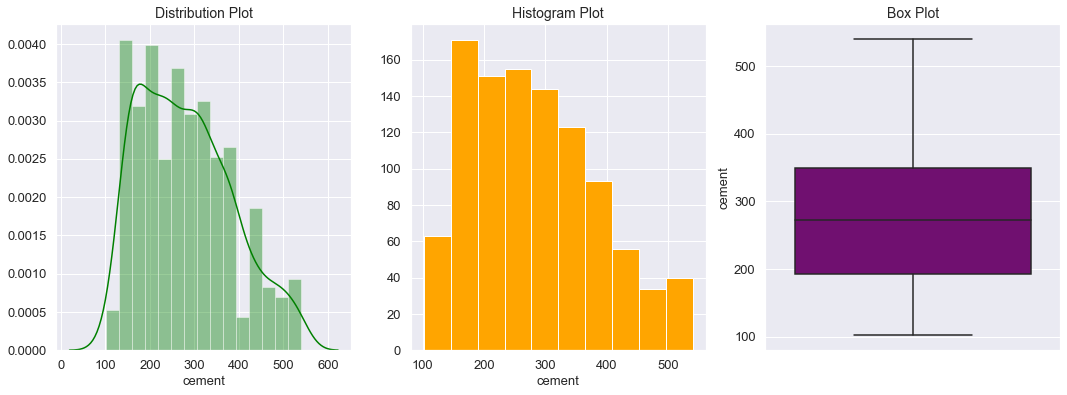

In [188]:
# Print Range, Min, Max, Mean, Median, Std, Q1, Q3, IQR, Outlier
# plot on column cement
PlotDistributionAndBox(concrete_df['cement'],'cement')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>cement is normally distributed, No outliers present</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Distribution of Variable - slag :
<font color=darkblue>
</font>

In [189]:
# Print Range, Min, Max, Mean, Median, Std, Q1, Q3, IQR, Outlier
# column slag
CentralValueAndOutlier(concrete_df['slag'], 'slag')

Range, Central, Quartile and Outlier Values for column :  slag
Range of values :  359.4


Minimum value :  0.0
Maximum: value :  359.4
Mean value :  73.89582524271844
Median value :  22.0
Standard Deviation :  86.2793417481054


25th Quartile value :  0.0
75th Quartile value :  142.95
Interquartile range (IQR) value :  142.95


Lower outlier :  -214.42499999999998
Upper outlier :  357.375
Number of Lower Outlier :  0
Number of Upper Outlier :  2
% of Low Outlier : 0.0 %
% of Upper Outlier : 0.0 %


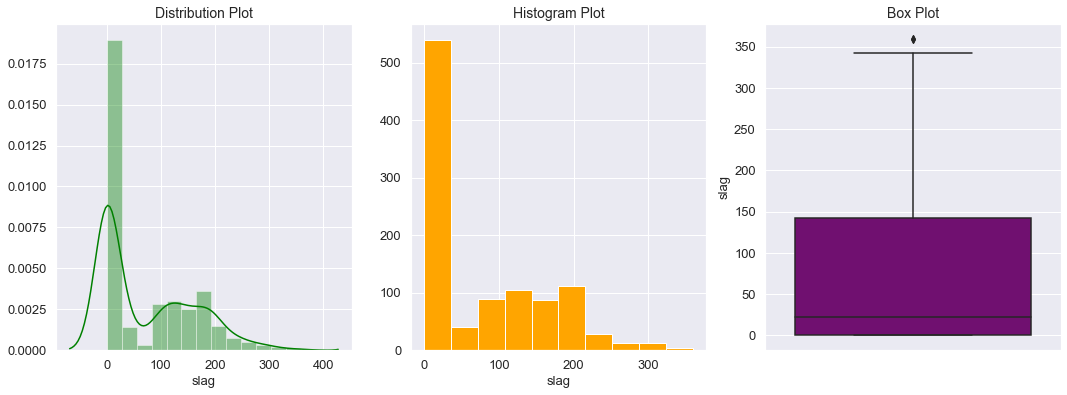

In [190]:
# Print Range, Min, Max, Mean, Median, Std, Q1, Q3, IQR, Outlier
# plot on column slag
PlotDistributionAndBox(concrete_df['slag'],'slag')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>slag is positively skewed, outliers present</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Distribution of Variable - ash :
<font color=darkblue>
</font>

In [191]:
# Print Range, Min, Max, Mean, Median, Std, Q1, Q3, IQR, Outlier
# column ash
CentralValueAndOutlier(concrete_df['ash'], 'ash')

Range, Central, Quartile and Outlier Values for column :  ash
Range of values :  200.1


Minimum value :  0.0
Maximum: value :  200.1
Mean value :  54.188349514563086
Median value :  0.0
Standard Deviation :  63.99700415268794


25th Quartile value :  0.0
75th Quartile value :  118.3
Interquartile range (IQR) value :  118.3


Lower outlier :  -177.45
Upper outlier :  295.75
Number of Lower Outlier :  0
Number of Upper Outlier :  0
% of Low Outlier : 0.0 %
% of Upper Outlier : 0.0 %


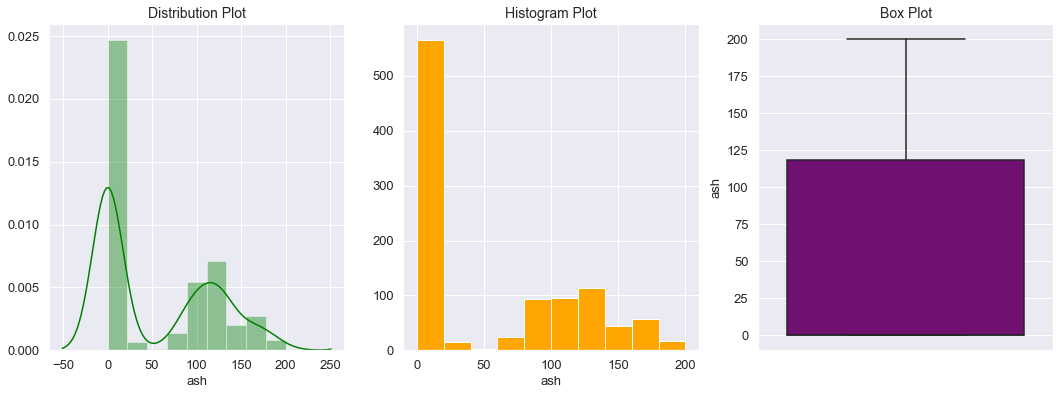

In [192]:
# Print Range, Min, Max, Mean, Median, Std, Q1, Q3, IQR, Outlier
# plot on column ash
PlotDistributionAndBox(concrete_df['ash'],'ash')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>ash is Normally Distributed, No outliers</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Distribution of Variable - water :
<font color=darkblue>
</font>

In [193]:
# Print Range, Min, Max, Mean, Median, Std, Q1, Q3, IQR, Outlier
# column water
CentralValueAndOutlier(concrete_df['water'], 'water')

Range, Central, Quartile and Outlier Values for column :  water
Range of values :  125.2


Minimum value :  121.8
Maximum: value :  247.0
Mean value :  181.56728155339798
Median value :  185.0
Standard Deviation :  21.35421856503245


25th Quartile value :  164.9
75th Quartile value :  192.0
Interquartile range (IQR) value :  27.099999999999994


Lower outlier :  124.25000000000001
Upper outlier :  232.64999999999998
Number of Lower Outlier :  5
Number of Upper Outlier :  4
% of Low Outlier : 0.0 %
% of Upper Outlier : 0.0 %


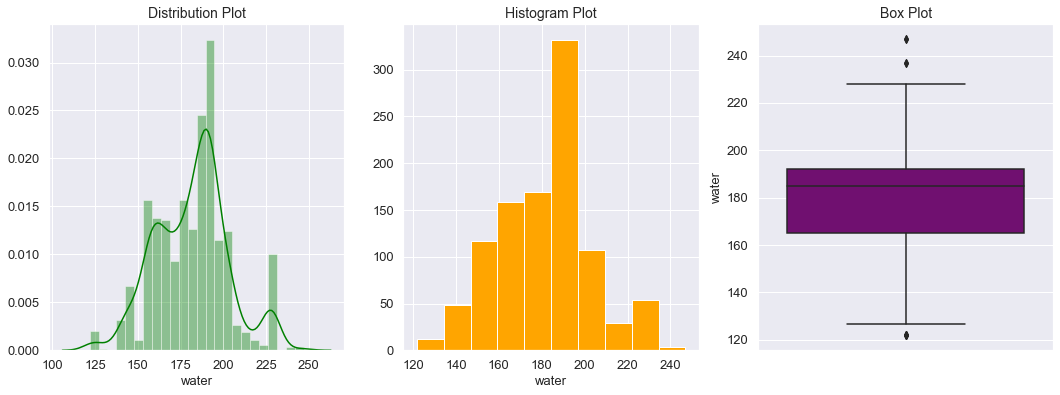

In [194]:
# Print Range, Min, Max, Mean, Median, Std, Q1, Q3, IQR, Outlier
# plot on column water
PlotDistributionAndBox(concrete_df['water'],'water')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>water is Normally Distributed, but outliers present</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Distribution of Variable - superplastic :
<font color=darkblue>
</font>

In [195]:
# Print Range, Min, Max, Mean, Median, Std, Q1, Q3, IQR, Outlier
# column superplastic
CentralValueAndOutlier(concrete_df['superplastic'], 'superplastic')

Range, Central, Quartile and Outlier Values for column :  superplastic
Range of values :  32.2


Minimum value :  0.0
Maximum: value :  32.2
Mean value :  6.204660194174756
Median value :  6.4
Standard Deviation :  5.973841392485508


25th Quartile value :  0.0
75th Quartile value :  10.2
Interquartile range (IQR) value :  10.2


Lower outlier :  -15.299999999999999
Upper outlier :  25.5
Number of Lower Outlier :  0
Number of Upper Outlier :  10
% of Low Outlier : 0.0 %
% of Upper Outlier : 1.0 %


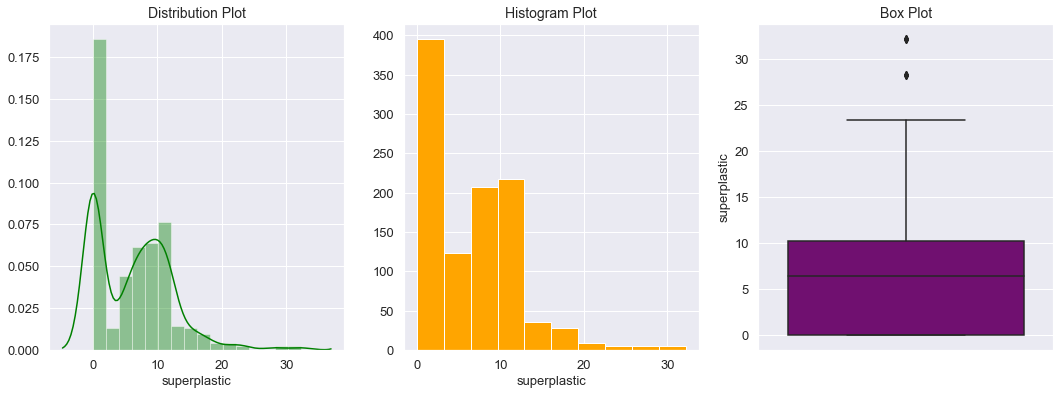

In [196]:
# Print Range, Min, Max, Mean, Median, Std, Q1, Q3, IQR, Outlier
# plot on column superplastic
PlotDistributionAndBox(concrete_df['superplastic'],'superplastic')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>superplastic is positively skewed, outliers present</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Distribution of Variable - coarseagg :
<font color=darkblue>
</font>

In [197]:
# Print Range, Min, Max, Mean, Median, Std, Q1, Q3, IQR, Outlier
# column coarseagg
CentralValueAndOutlier(concrete_df['coarseagg'], 'coarseagg')

Range, Central, Quartile and Outlier Values for column :  coarseagg
Range of values :  344.0


Minimum value :  801.0
Maximum: value :  1145.0
Mean value :  972.918932038835
Median value :  968.0
Standard Deviation :  77.75395396672087


25th Quartile value :  932.0
75th Quartile value :  1029.4
Interquartile range (IQR) value :  97.40000000000009


Lower outlier :  785.8999999999999
Upper outlier :  1175.5000000000002
Number of Lower Outlier :  0
Number of Upper Outlier :  0
% of Low Outlier : 0.0 %
% of Upper Outlier : 0.0 %


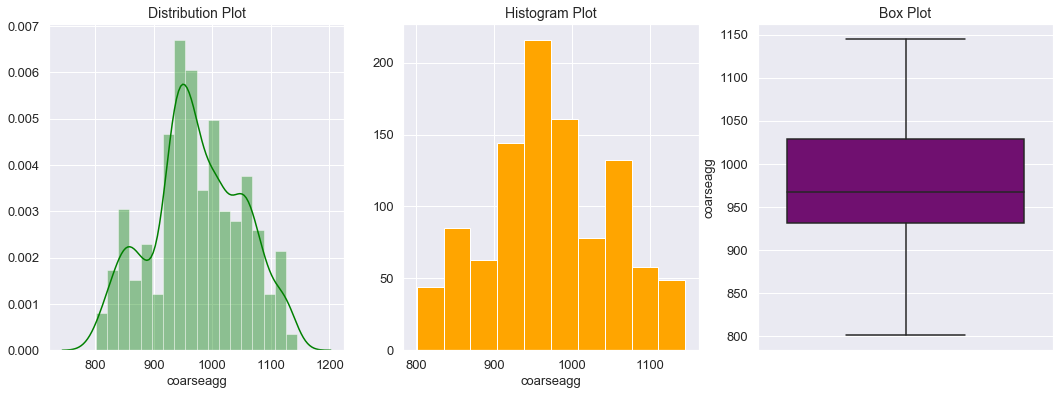

In [198]:
# Print Range, Min, Max, Mean, Median, Std, Q1, Q3, IQR, Outlier
# plot on column cement
PlotDistributionAndBox(concrete_df['coarseagg'],'coarseagg')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>coarseagg is Normally Distributed, No outliers</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Distribution of Variable - fineagg :
<font color=darkblue>
</font>

In [199]:
# Print Range, Min, Max, Mean, Median, Std, Q1, Q3, IQR, Outlier
# column fineagg
CentralValueAndOutlier(concrete_df['fineagg'], 'fineagg')

Range, Central, Quartile and Outlier Values for column :  fineagg
Range of values :  398.6


Minimum value :  594.0
Maximum: value :  992.6
Mean value :  773.5804854368932
Median value :  779.5
Standard Deviation :  80.17598014240443


25th Quartile value :  730.9499999999999
75th Quartile value :  824.0
Interquartile range (IQR) value :  93.05000000000007


Lower outlier :  591.3749999999998
Upper outlier :  963.575
Number of Lower Outlier :  0
Number of Upper Outlier :  5
% of Low Outlier : 0.0 %
% of Upper Outlier : 0.0 %


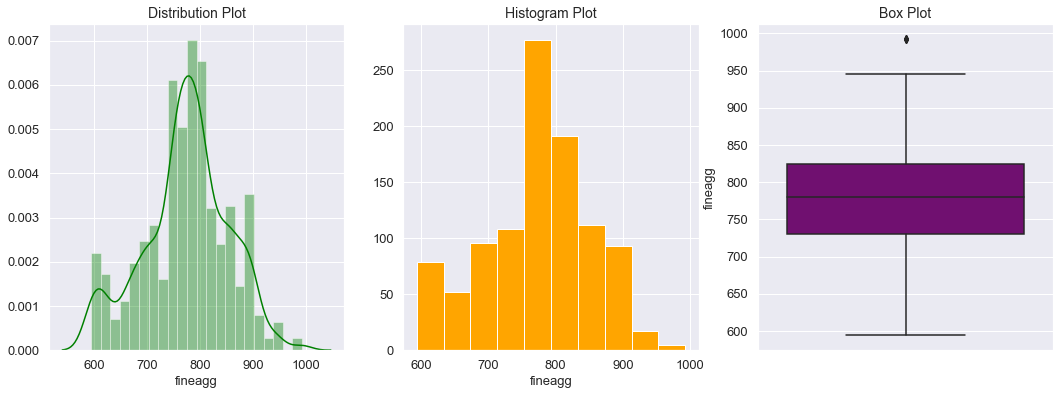

In [200]:
# Print Range, Min, Max, Mean, Median, Std, Q1, Q3, IQR, Outlier
# plot on column fineagg
PlotDistributionAndBox(concrete_df['fineagg'],'fineagg')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>fineagg is Normally Distributed, but outliers present</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Distribution of Variable - age :
<font color=darkblue>
</font>

In [201]:
# Print Range, Min, Max, Mean, Median, Std, Q1, Q3, IQR, Outlier
# column age
CentralValueAndOutlier(concrete_df['age'], 'age')

Range, Central, Quartile and Outlier Values for column :  age
Range of values :  364


Minimum value :  1
Maximum: value :  365
Mean value :  45.662135922330094
Median value :  28.0
Standard Deviation :  63.16991158103279


25th Quartile value :  7.0
75th Quartile value :  56.0
Interquartile range (IQR) value :  49.0


Lower outlier :  -66.5
Upper outlier :  129.5
Number of Lower Outlier :  0
Number of Upper Outlier :  59
% of Low Outlier : 0.0 %
% of Upper Outlier : 6.0 %


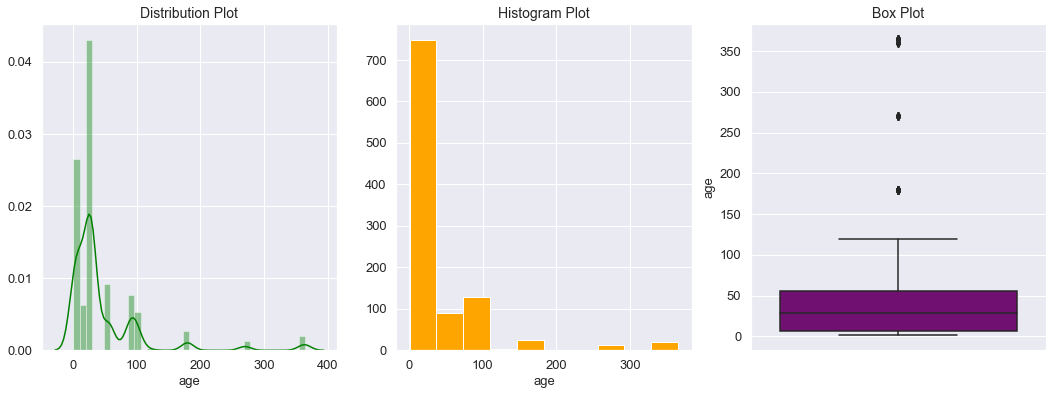

In [202]:
# Print Range, Min, Max, Mean, Median, Std, Q1, Q3, IQR, Outlier
# plot on column age
PlotDistributionAndBox(concrete_df['age'],'age')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>age is positively skewed, outliers present</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Skewness Check :
<font color=darkblue>
</font>

In [203]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(concrete_df['cement']),stats.skew(concrete_df['slag']),
                                       stats.skew(concrete_df['ash']),stats.skew(concrete_df['water']),
                                       stats.skew(concrete_df['superplastic']),stats.skew(concrete_df['coarseagg']),
                                       stats.skew(concrete_df['fineagg']),stats.skew(concrete_df['age'])]},
                        index=['cement', 'slag', 'ash', 'water', 'superplastic', 
                               'coarseagg', 'fineagg', 'age'])


Skewness

,Skewness
cement,0.508739
slag,0.799550
ash,0.536571
water,0.074520
superplastic,0.905881
coarseagg,-0.040161
fineagg,-0.252641
age,3.264415


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>cement is positively skewed</li>
<li>slag is positively skewed</li>
<li>ash is positively skewed</li>
<li>No Skewness in water</li>
<li>superplastic is highly positively skewed</li>
<li>coarseagg is marginally negatively skewed</li>
<li>fineagg is marginally negatively skewed</li>
<li>age is highly positively skewed</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Biivariate Analysis :
<font color=darkblue>
</font>

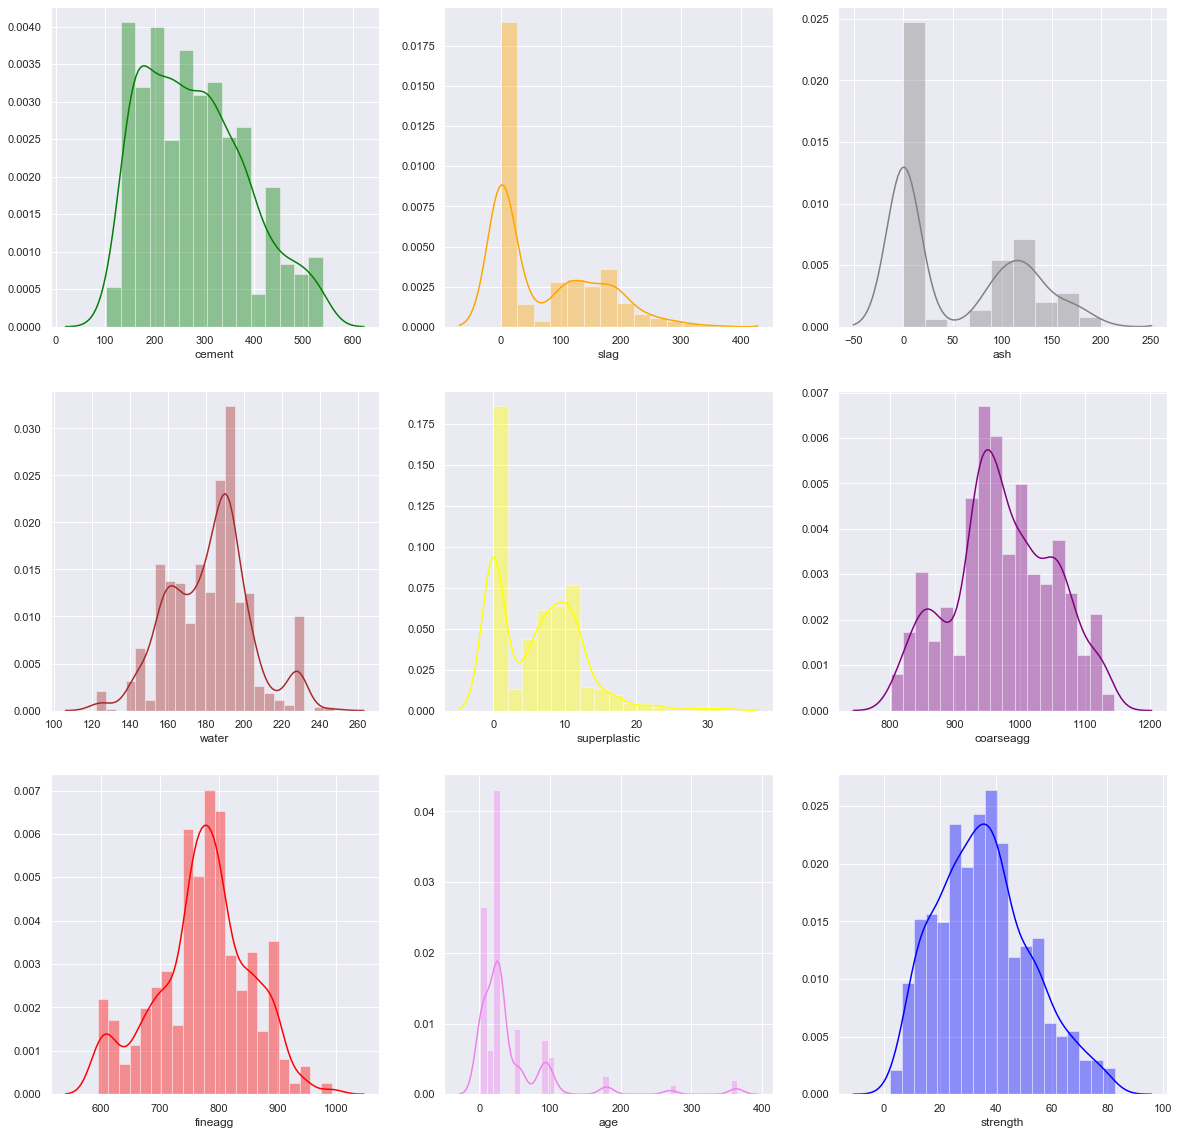

In [204]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
sns.distplot(concrete_df['cement'],ax=ax[0][0],color='green')
sns.distplot(concrete_df['slag'],ax=ax[0][1],color='orange')
sns.distplot(concrete_df['ash'],ax=ax[0][2],color='grey')
sns.distplot(concrete_df['water'],ax=ax[1][0],color='brown')
sns.distplot(concrete_df['superplastic'],ax=ax[1][1],color='yellow')
sns.distplot(concrete_df['coarseagg'],ax=ax[1][2],color='purple')
sns.distplot(concrete_df['fineagg'],ax=ax[2][0],color='red')
sns.distplot(concrete_df['age'],ax=ax[2][1],color='violet')
sns.distplot(concrete_df['strength'],ax=ax[2][2],color='blue')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>cement attribute is normal distributed</li>
<li>slag has three gausssians and rightly skewed</li>
<li>ash has two gaussians and rightly skewed</li>
<li>water has three guassians and slighly left skewed</li>
<li>superplastic has two gaussians and rightly skewed</li>
<li>coarseagg has three guassians and almost normal</li>
<li>fineagg has almost two guassians and looks like normal</li>
<li>age has multiple guassians and rightly skewed</li>
</ul>
</font>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000132D420D748>,
      dtype=object)

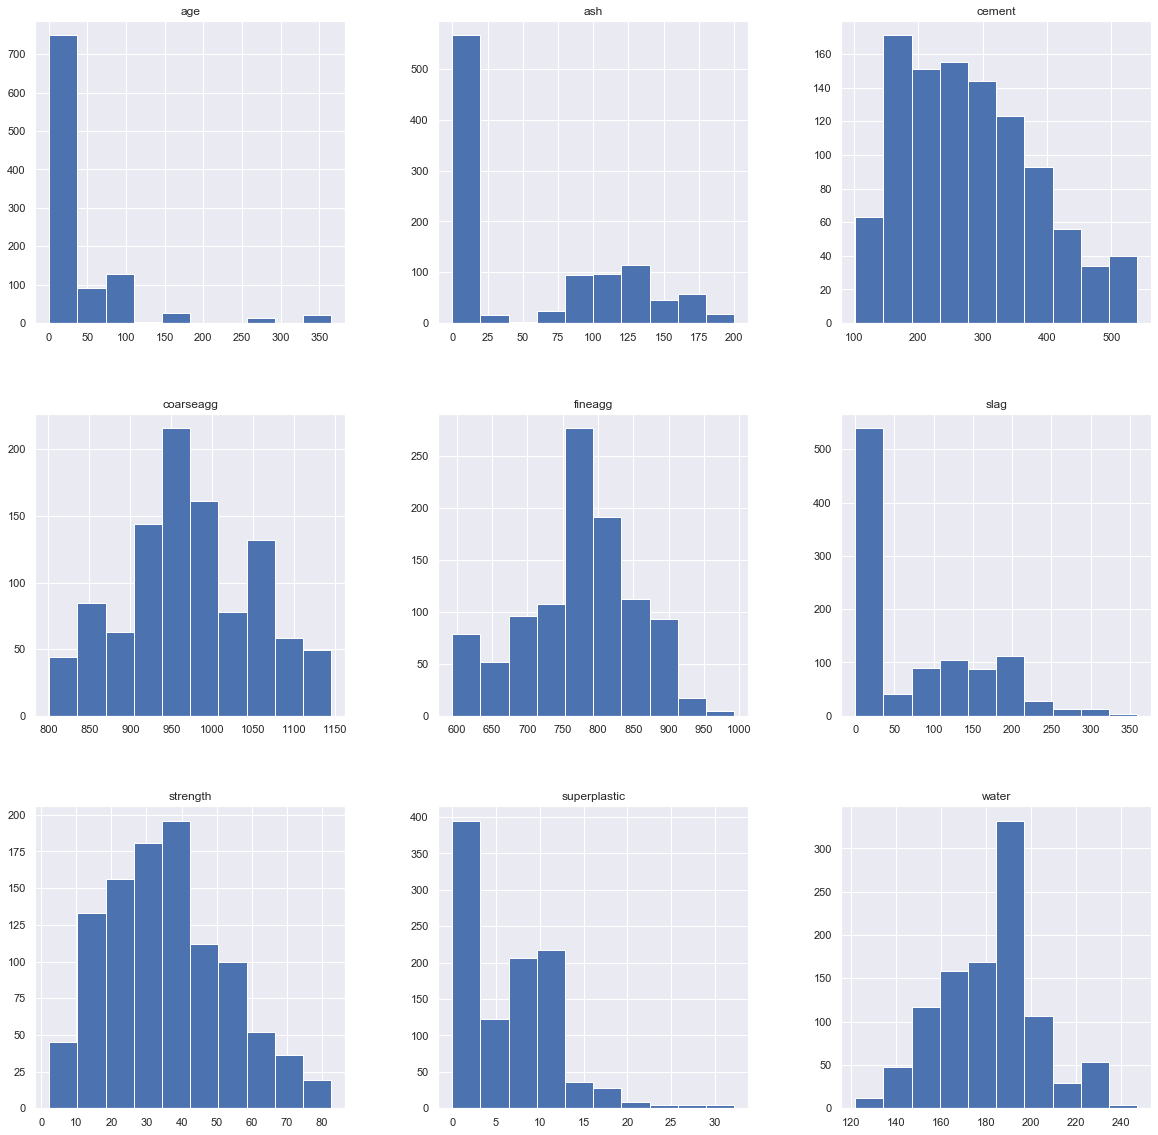

In [205]:
concrete_df.hist(figsize=(20, 20))

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Attributes age, ash, slag and superplastic show high skewness</li>
<li>Attributes cement show moderate skewness</li>
<li>Attributes coarseagg, fineagg and water look normally distributed</li>
</ul>
</font>

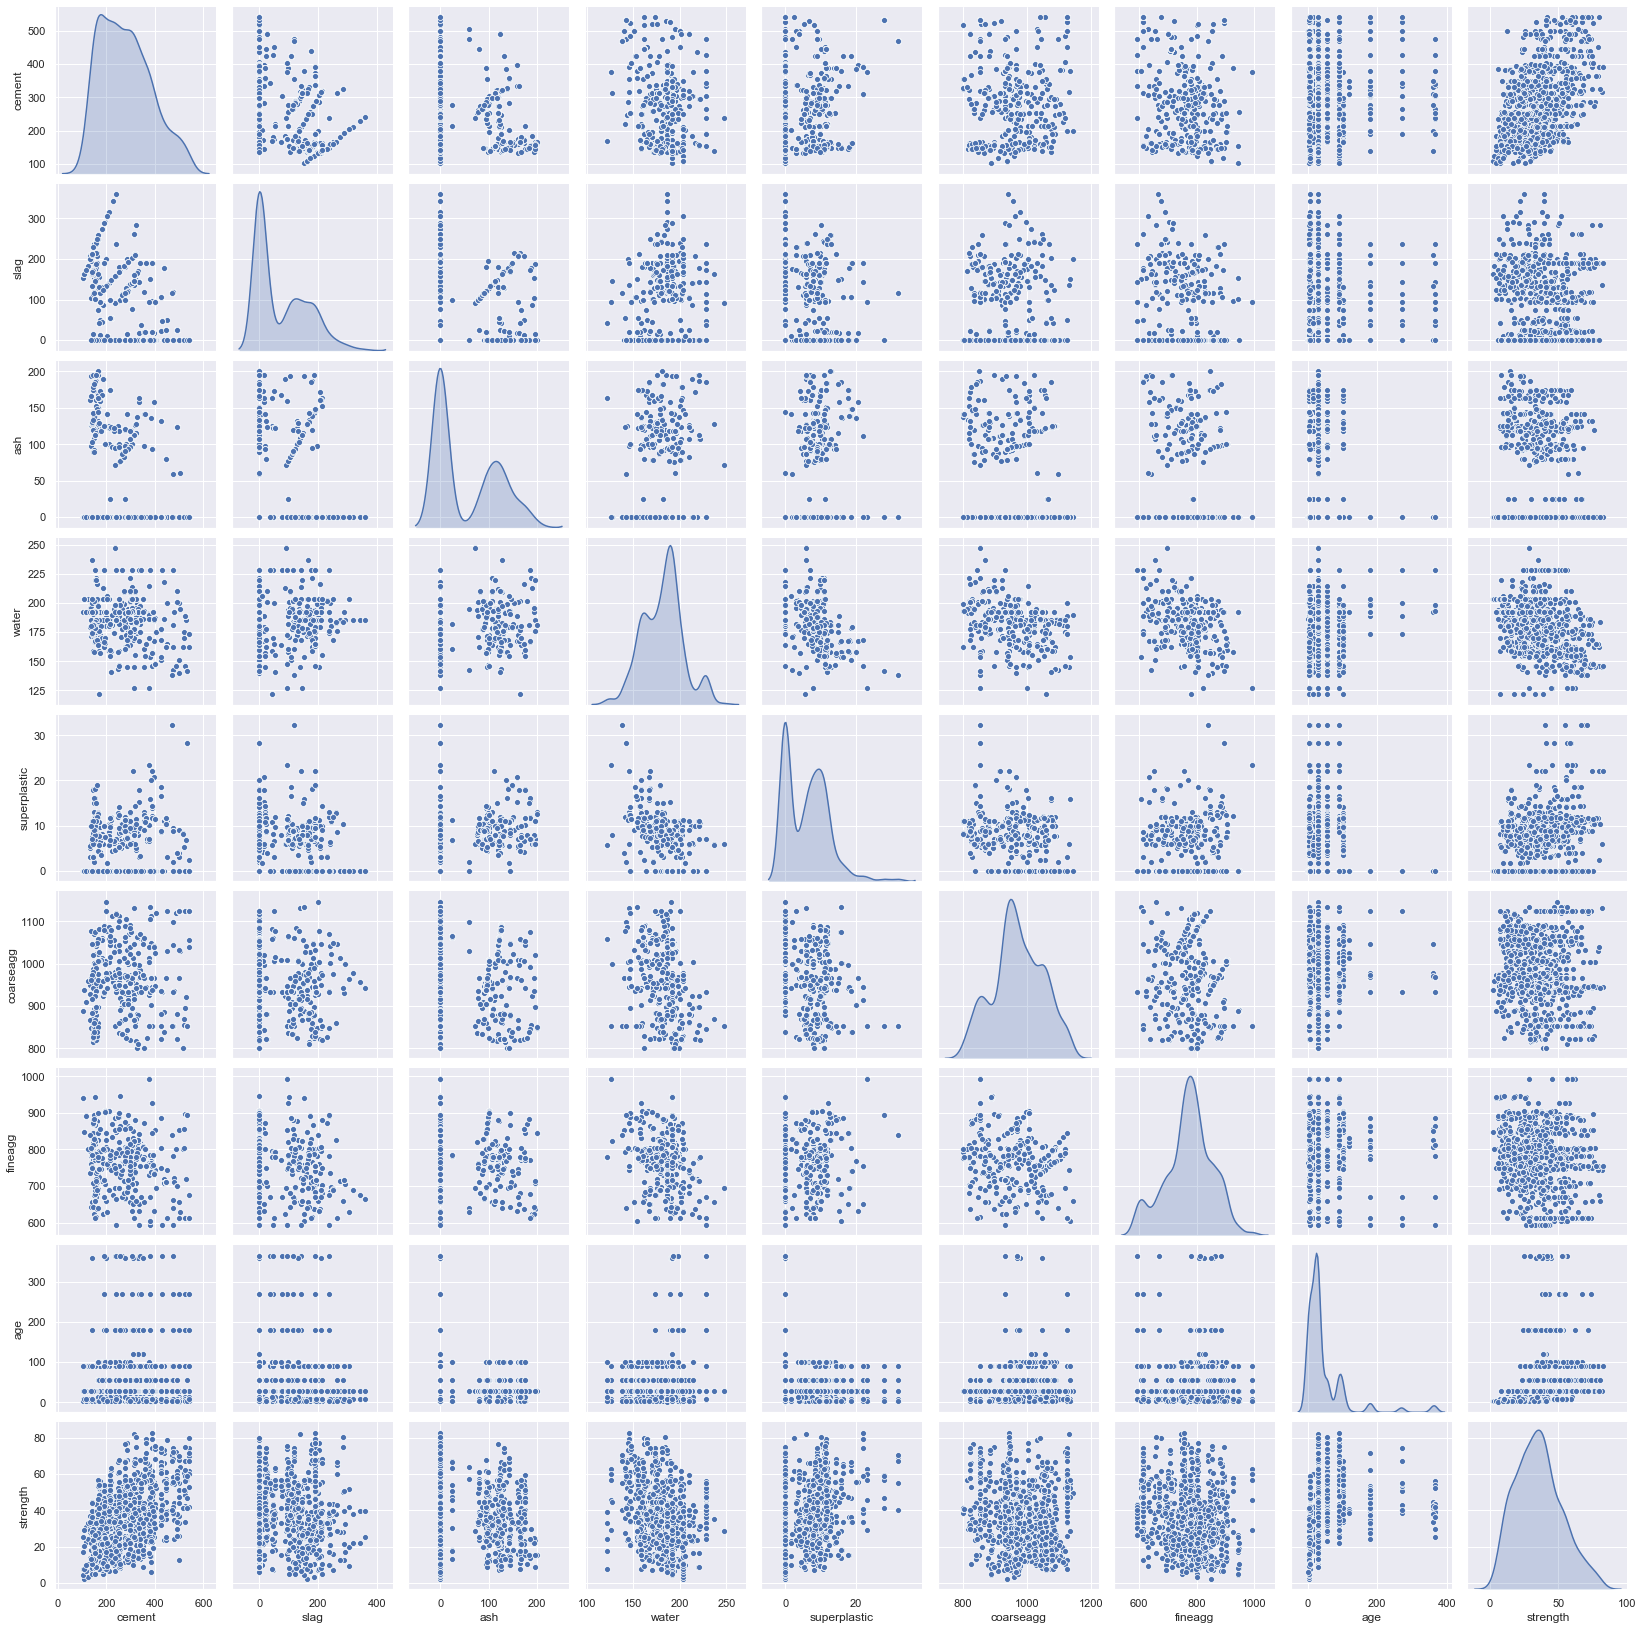

In [206]:
sns.pairplot(concrete_df, diag_kind='kde')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Attributes cement and superplastic have linear relationship with target variable strength. Target variable do not show any kind of relationship with other Independent variables</li>
<li>Attribute water seems to be negatively related with strength</li>
<li>Slightly non-linear relation can be observed between age and strength</li>
<li>fineagg and coarseagg shows slight negative linear relationship with water</li>
<li>superplastic attribute has negative correlation with the water.</li>
<li>Except for strength and cement attributes, density curves for most of the attribute show multiple peaks</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Correlation Check :
<font color=darkblue>
</font>

In [207]:
concrete_df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


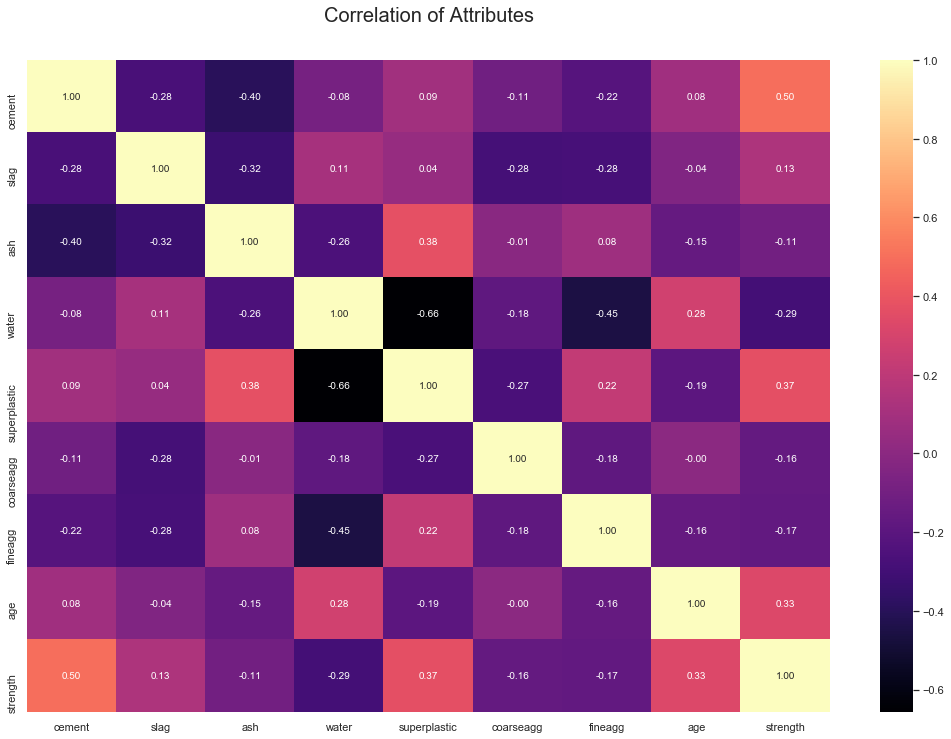

In [208]:
plt.figure(figsize = (18,12))
plt.title('Correlation of Attributes', y=1.05, size=20)
sns.heatmap( concrete_df.corr(), cmap='magma',annot=True, fmt='.2f')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Target attribute strength is moderately correlated (positive) to cement attribute</li>
<li>Target attribute strength is highly correlated with superplastic and age</li>
<li>Target attribute strength is slightly negatively correlated with ash, fineagg and coarseagg</li>
<li>Target attribute strength is negatively correlated with water to some extent</li>
</ul>
</font>


### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Missing Value / Outlier Treatment :
<font color=darkblue>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Missing Values Check:
<font color=darkblue>
</font>

In [209]:
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
There are no missing values in any of the rows and columns
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Outlier Check:
<font color=darkblue>
</font>

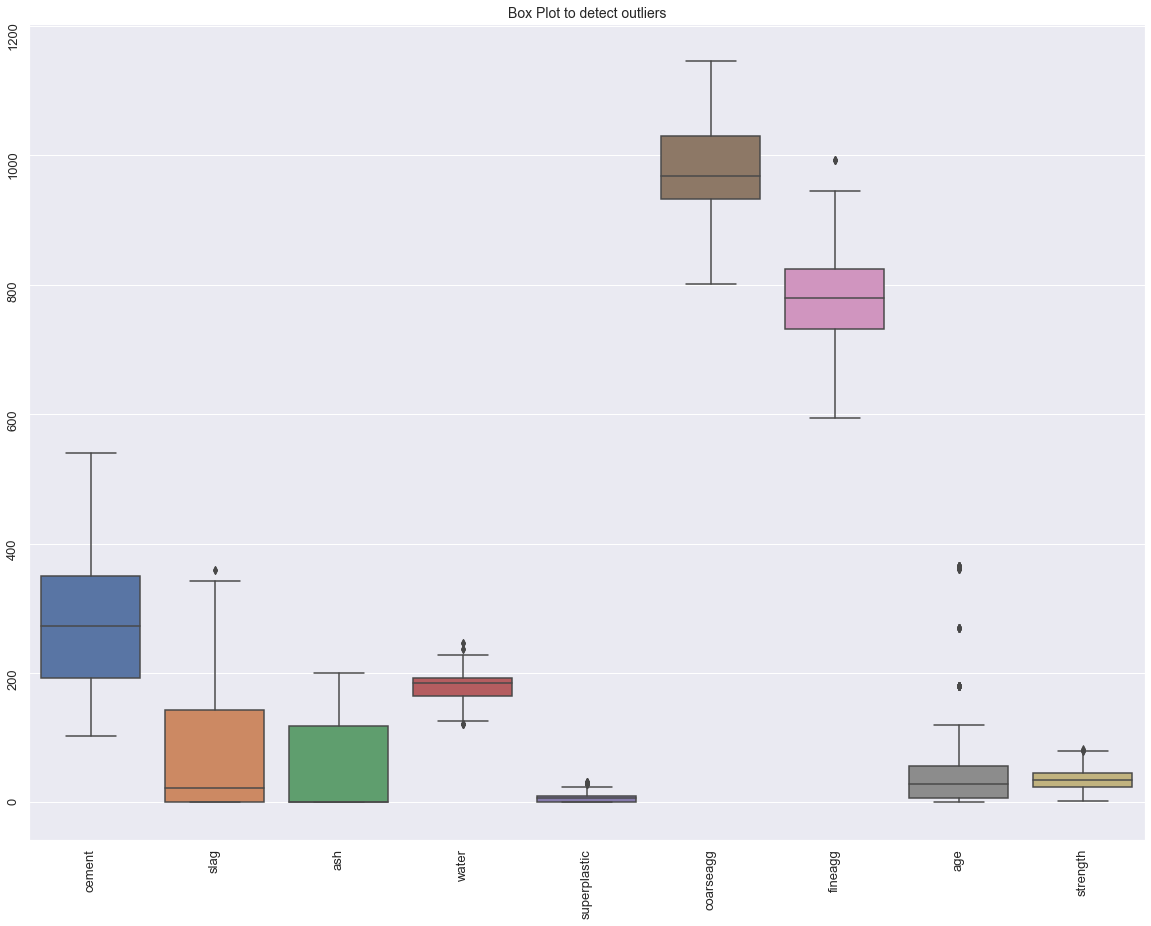

In [210]:
plt.figure(figsize=(20,15))
plt.title('Box Plot to detect outliers', fontsize=14)
sns.boxplot(data=concrete_df,orient='v')
plt.tick_params(labelsize=13,rotation=90)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>We observe attributes slag, water, superplastic and age contains outliers</li>
</ul>
</font>

In [211]:
for icolumn in concrete_df.columns.tolist():
    dq1 = concrete_df[icolumn].quantile(0.25)
    dq3 = concrete_df[icolumn].quantile(0.75)
    diqr = dq3-dq1 
    dfence_low  = dq1-1.5*diqr
    dfence_high = dq3+1.5*diqr
    doutliers = concrete_df[icolumn][(concrete_df[icolumn] < dfence_low)|(concrete_df[icolumn] > dfence_high)]
    print('Number of Outlier in', icolumn, ':', doutliers.count())


Number of Outlier in cement : 0
Number of Outlier in slag : 2
Number of Outlier in ash : 0
Number of Outlier in water : 9
Number of Outlier in superplastic : 10
Number of Outlier in coarseagg : 0
Number of Outlier in fineagg : 5
Number of Outlier in age : 59
Number of Outlier in strength : 4


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
With outliers in slag, water, superplastic, fineagg and age attributes, we will replace outliers with respective median values
</font>

In [212]:
for icolumn in concrete_df.columns[:-1]:
    rq1 = concrete_df[icolumn].quantile(0.25)
    rq3 = concrete_df[icolumn].quantile(0.75)
    riqr = rq3-rq1 
    rfence_low  = rq1-1.5*riqr
    rfence_high = rq3+1.5*riqr
    concrete_df[icolumn].replace(concrete_df.loc[(concrete_df[icolumn] < rfence_low)|(concrete_df[icolumn] > rfence_high), icolumn], 
                                 concrete_df[icolumn].median(),inplace=True)


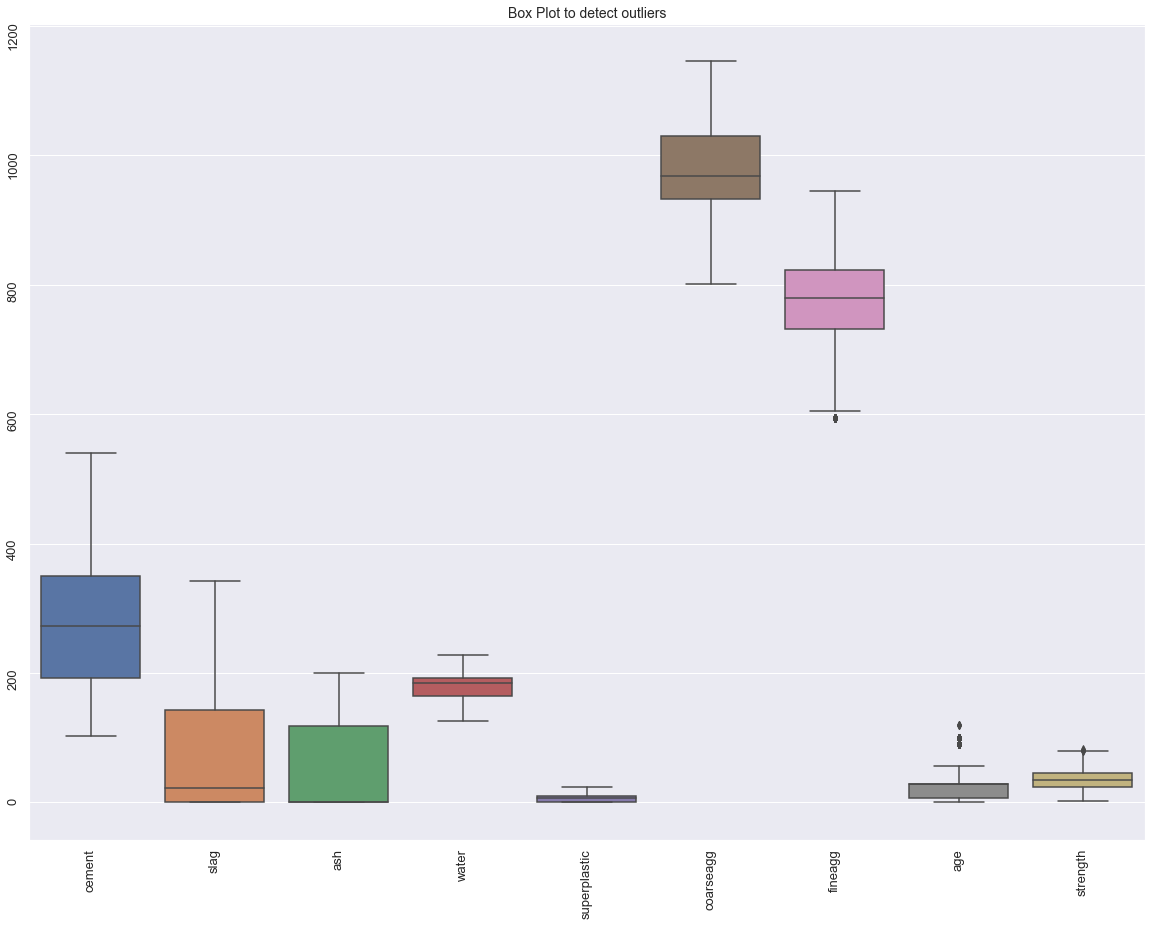

In [213]:
plt.figure(figsize=(20,15))
plt.title('Box Plot to detect outliers', fontsize=14)
sns.boxplot(data=concrete_df,orient='v')
plt.tick_params(labelsize=13,rotation=90)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>outliers removed in slag, water, superplastic attributes</li>
<li>new outliers created in fineagg and age attributes</li>
</ul>
</font>

## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Deliverable - 2 (Feature Engineering techniques)
<font color=darkblue>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Identify Opportunities :
<font color=darkblue>
    We will add composite feature named water-cement-ratio which is useful to predict the concrete strength
<br>We see a non-linear relationship between water-cement ratio and concrete strenth. Smaller values of water-cement ratio (W/C) are associated with higher values of concrete strength
</font>

In [214]:
concrete_df_comp = concrete_df.copy()

In [215]:
concrete_df_comp.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [216]:
concrete_df_comp.insert(8, 'water/cement', concrete_df['water']/concrete_df['cement'])
concrete_df_comp.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water/cement,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,1.440198,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,0.937241,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,0.749600,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,0.857143,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,1.248708,18.29


In [217]:
concrete_df_comp.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water/cement,strength
cement,1.000000,-0.275046,-0.397467,-0.091614,0.013336,-0.109349,-0.238698,-0.031962,-0.884607,0.497832
slag,-0.275046,1.000000,-0.320468,0.098880,0.061195,-0.283882,-0.282383,-0.028971,0.356693,0.137800
ash,-0.397467,-0.320468,1.000000,-0.248011,0.447492,-0.009961,0.091729,0.057928,0.253751,-0.105755
water,-0.091614,0.098880,-0.248011,1.000000,-0.658056,-0.156928,-0.426299,-0.040304,0.325203,-0.307711
superplastic,0.013336,0.061195,0.447492,-0.658056,1.000000,-0.224503,0.156591,0.062013,-0.181558,0.346260
coarseagg,-0.109349,-0.283882,-0.009961,-0.156928,-0.224503,1.000000,-0.161377,0.018078,-0.022338,-0.164935
fineagg,-0.238698,-0.282383,0.091729,-0.426299,0.156591,-0.161377,1.000000,0.051532,0.090906,-0.182186
age,-0.031962,-0.028971,0.057928,-0.040304,0.062013,0.018078,0.051532,1.000000,-0.000438,0.499850
water/cement,-0.884607,0.356693,0.253751,0.325203,-0.181558,-0.022338,0.090906,-0.000438,1.000000,-0.505594
strength,0.497832,0.137800,-0.105755,-0.307711,0.346260,-0.164935,-0.182186,0.499850,-0.505594,1.000000


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>It is observed that new feature is moderately correlated (negatively) with target attribute</li>
<li>We will not drop any feature for the time being, however after feature engineering stage, we may choose to drop some features to avoid overfitting</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Decide on complexity of the model :
<font color=darkblue>
Strength of the concrete is a highly nonlinear function of age. Using simple linear model will not help here to get better modeling accuracy. Use of quadratic and higher degree makes sense in this case to incorporate the nonlinear relationship between target and independent attributes
<br><br>
In order to incorporate the non-linear feature interaction among independent features we choose to add polynomial features with degree 3.
</font>

In [218]:
poly3 = PolynomialFeatures(degree=3, interaction_only=True)
poly3_feat = poly3.fit_transform(concrete_df_comp.drop('strength', axis=1))
concrete_df_ploy3 = pd.DataFrame(poly3_feat, columns=['feat_'+str(x) for x in range(poly3_feat.shape[1])])
concrete_df_ploy3.head()


,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129
0,1.0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,1.440198,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036
1,1.0,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,0.937241,...,9293755.968,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655
2,1.0,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,0.749600,...,4532452.540,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560
3,1.0,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,0.857143,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000
4,1.0,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,1.248708,...,6640484.578,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382


In [219]:
concrete_df_feat = concrete_df_comp.drop('strength', axis=1).join(concrete_df_ploy3)
concrete_df_feat['strength'] = concrete_df_comp['strength']
concrete_df_feat.shape

(1030, 140)

In [220]:
concrete_df_feat.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water/cement,feat_0,...,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,1.440198,1.0,...,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,0.937241,1.0,...,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,0.749600,1.0,...,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,0.857143,1.0,...,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,1.248708,1.0,...,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382,18.29


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
New dataframe with features contains 139 independent and 1 target attribute. As all the features is not useful, we will apply LASSO regularization to select relevant features. This will help in reducing overfitting of models
</font>

In [221]:
X_Indepenent_Feat = concrete_df_feat.drop(['strength'], axis=1)
Y_Target_Feat = concrete_df_feat[['strength']]

X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(X_Indepenent_Feat, Y_Target_Feat, 
                                                                        test_size=0.3, random_state=1)


In [222]:
model_lasso = Lasso()
model_lasso.fit(X_train_feat, y_train_feat)


Lasso()

In [223]:
print("Lasso model coef :\n ", (model_lasso.coef_))

Lasso model coef :
  [ 3.65669350e-02 -2.12767955e-02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -1.14341328e-01  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  7.68833079e-03 -2.65607426e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -5.20882073e-03  0.00000000e+00 -0.00000000e+00 -3.88210066e-04
 -1.12245050e-04 -2.65201758e-04 -4.32396790e-03  1.34416475e-04
 -9.51602510e-05  8.22345829e-04  0.00000000e+00 -1.09284359e-04
 -6.34227639e-05  1.65691611e-02 -9.97367506e-06 -5.16012510e-05
  8.63254910e-04  0.00000000e+00  8.23005955e-05 -1.85895960e-03
  6.34780599e-05  6.03175031e-05 -9.93011338e-04  0.00000000e+00
  1.16448329e-02 -4.58943415e-04  2.29488346e-04 -5.80722620e-04
 -0.00000000e+00 -2.04960749e-03 -1.16063383e-03  0.00000000e+00
 -0.00000000e+00  7.63959365e-05  1.59267018e-04 -2.02584591e-02
 -1.97698311e-04  0.00000000e+00  0.00000000e+00  1.63378691e-06
  1.66698498e-06 -7.96823773e-06 -3.88183040e-07  4.75901290e-07
 -2.

In [224]:
model_lasso_feat = X_train_feat.columns[model_lasso.coef_!=0].tolist()

print("Out of total {} independent features, number of features selected by LASSO regularization are {} " 
      .format(X_train_feat.shape[1], len(model_lasso_feat)))


Out of total 139 independent features, number of features selected by LASSO regularization are 118 


In [225]:
concrete_df_feat = concrete_df_feat[model_lasso_feat]
concrete_df_feat.head()

,cement,slag,fineagg,feat_1,feat_2,feat_7,feat_10,feat_11,feat_12,feat_13,...,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129
0,141.3,212.0,748.5,141.3,212.0,748.5,29955.60,0.00,28754.55,0.00,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036
1,168.9,42.2,796.2,168.9,42.2,796.2,7127.58,20994.27,26736.87,1824.12,...,9293755.968,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655
2,250.0,0.0,861.2,250.0,0.0,861.2,0.00,23925.00,46850.00,1375.00,...,4532452.540,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560
3,266.0,114.0,670.0,266.0,114.0,670.0,30324.00,0.00,60648.00,0.00,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000
4,154.8,183.4,696.7,154.8,183.4,696.7,28390.32,0.00,29922.84,1408.68,...,6640484.578,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382


### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Explore for Gaussians :
<font color=darkblue>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Scale Data : z Score
<font color=darkblue>
age attribute is of different unit of compared to other attributes. we apply z scoring for scaling
</font>

In [226]:
concrete_df_z = concrete_df.apply(zscore)
concrete_df_z = pd.DataFrame(concrete_df_z, columns=concrete_df.columns)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Split Data :
<font color=darkblue>
</font>

In [227]:
X_Indepenent = concrete_df_z.drop(['strength'], axis=1)
Y_Target = concrete_df_z[['strength']]

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X_Indepenent, Y_Target, test_size=0.3, random_state=1)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Decision Tree Regression :
<font color=darkblue>
</font>

In [229]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)


DecisionTreeRegressor()

In [230]:
print('Feature Importance : \n', pd.DataFrame(model_dt.feature_importances_, columns=['Imp'], index=X_train.columns))

Feature Importance : 
                    Imp
cement        0.349048
slag          0.093134
ash           0.012541
water         0.129056
superplastic  0.018767
coarseagg     0.038508
fineagg       0.030350
age           0.328595


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Attributes cement, water and age are significant attributes with high impact on strength column. Attributes ash, coarseagg, fineagg, superplastic and slag are less significant.
</font>

In [231]:
model_dt_y_predicted = model_dt.predict(X_test)
model_dt_score_train = model_dt.score(X_train, y_train)
model_dt_score_test = model_dt.score(X_test, y_test)
model_dt_accuracy = metrics.r2_score(y_test, model_dt_y_predicted)
model_dt_mse = metrics.mean_squared_error(y_test, model_dt_y_predicted)

In [232]:
print('Performance on Training Data using DT : ', model_dt_score_train)
print('Performance on Test Data using DT : ', model_dt_score_test)
print('Accuracy DT : ', model_dt_accuracy)
print('Mean Squared Error DT : ', model_dt_mse)

Performance on Training Data using DT :  0.9917907420889983
Performance on Test Data using DT :  0.8512265109354591
Accuracy DT :  0.8512265109354591
Mean Squared Error DT :  0.1552987227622974


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Overfitting in model is observed as the dataset performs with 99% accuracy in training data, however accuracy on test data drops.
</font>

In [233]:
model_results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': model_dt_accuracy}, index=['1'])
model_results = model_results[['Method', 'accuracy']]
model_results

,Method,accuracy
1,Decision Tree,0.851227


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">K Fold Cross Validation : (on Decision Tree)
<font color=darkblue>
</font>

In [234]:
num_folds = 18
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
model_dt_kfold = cross_val_score(model_dt, X_Indepenent, Y_Target, cv=kfold)
model_dt_kfold_accuracy = np.mean(abs(model_dt_kfold))

In [235]:
print('Average Accuracy : ', model_dt_kfold_accuracy)
print('Standard Deviation : ', model_dt_kfold.std())

Average Accuracy :  0.8696975308132722
Standard Deviation :  0.04176973822177663


In [236]:
model_results_temp = pd.DataFrame({'Method':['Decision Tree K Fold'], 'accuracy': model_dt_kfold_accuracy}, index=['2'])
model_results = pd.concat([model_results, model_results_temp])
model_results = model_results[['Method', 'accuracy']]
model_results

,Method,accuracy
1,Decision Tree,0.851227
2,Decision Tree K Fold,0.869698


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Decision Tree Regression : Iteration 2
<font color=darkblue>
We will perform another second iteration by dropping least significant variables
</font>

In [237]:
concrete_df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   float64
 8   strength      1030 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB


In [238]:
concrete_df_z_2 = concrete_df_z.copy()

In [239]:
X_Indepenent = concrete_df_z_2.drop(['strength', 'ash', 'coarseagg', 'fineagg'], axis=1)
Y_Target = concrete_df_z_2[['strength']]

X_train, X_test, y_train, y_test = train_test_split(X_Indepenent, Y_Target, test_size=0.3, random_state=1)

In [240]:
model_dt_2 = DecisionTreeRegressor()
model_dt_2.fit(X_train, y_train)

DecisionTreeRegressor()

In [241]:
print('Feature Importance : \n', pd.DataFrame(model_dt_2.feature_importances_, columns=['Imp'], index=X_train.columns))

Feature Importance : 
                    Imp
cement        0.369009
slag          0.113008
water         0.154331
superplastic  0.034717
age           0.328935


In [242]:
model_dt_2_y_predicted = model_dt_2.predict(X_test)
model_dt_2_score_train = model_dt_2.score(X_train, y_train)
model_dt_2_score_test = model_dt_2.score(X_test, y_test)
model_dt_2_accuracy = metrics.r2_score(y_test, model_dt_2_y_predicted)
model_dt_2_mse = metrics.mean_squared_error(y_test, model_dt_2_y_predicted)

In [243]:
print('Performance on Training Data using DT : ', model_dt_2_score_train)
print('Performance on Test Data using DT : ', model_dt_2_score_test)
print('Accuracy DT : ', model_dt_2_accuracy)
print('Mean Squared Error DT : ', model_dt_2_mse)

Performance on Training Data using DT :  0.9910459656545207
Performance on Test Data using DT :  0.8301044625270294
Accuracy DT :  0.8301044625270294
Mean Squared Error DT :  0.1773471882555649


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
No improvement in testing dataset accuracy. Overfitting in model is still observed.
</font>

In [244]:
model_results_temp = pd.DataFrame({'Method':['Decision Tree Iteration 2'], 'accuracy': model_dt_2_accuracy}, index=['3'])
model_results = pd.concat([model_results, model_results_temp])
model_results = model_results[['Method', 'accuracy']]

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Decision Tree Regularization / Pruning : 
<font color=darkblue>
</font>

In [245]:
X_Indepenent = concrete_df_z.drop(['strength'], axis=1)
Y_Target = concrete_df_z[['strength']]

X_train, X_test, y_train, y_test = train_test_split(X_Indepenent, Y_Target, test_size=0.3, random_state=1)

In [246]:
model_dt_pruned = DecisionTreeRegressor(max_depth=4, random_state=1, min_samples_leaf=5)
model_dt_pruned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [247]:
print('Feature Importance : \n', pd.DataFrame(model_dt_pruned.feature_importances_, 
                                              columns=['Imp'], index=X_train.columns))

Feature Importance : 
                    Imp
cement        0.416953
slag          0.025822
ash           0.000000
water         0.135128
superplastic  0.017987
coarseagg     0.000000
fineagg       0.007793
age           0.396318


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Attributes ash, coarseagg, fineagg are less significant.
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Visualizing Decision Tree :
<font color=darkblue>
</font>

In [248]:
from sklearn.tree import export_graphviz

train_char_label = ['No', 'Yes']
Concrete_Tree_File = open('concrete_tree.dot', 'w')
dot_data = export_graphviz(model_dt_pruned, out_file=Concrete_Tree_File, 
                           feature_names=list(X_train), 
                           class_names=list(train_char_label))
Concrete_Tree_File.close()

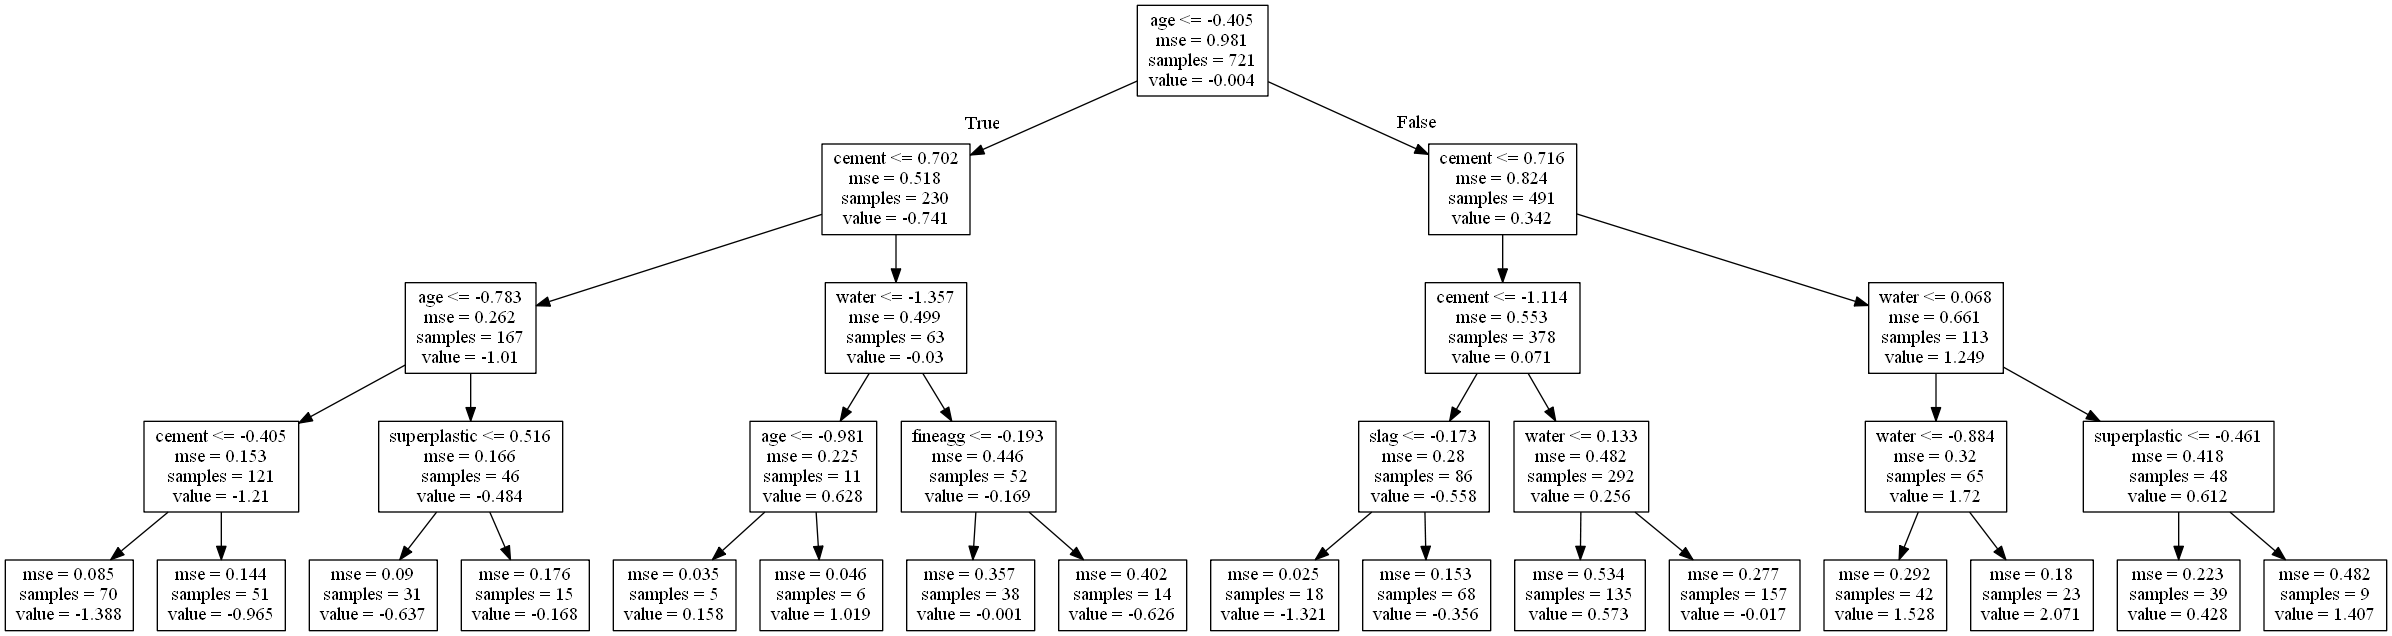

In [249]:
from os import system
from IPython.display import Image

retCode = system("dot -Tpng concrete_tree.dot -o concrete_tree.png")
if(retCode > 0):
    print("system command returning error : " + str(retCode))
else:
    display(Image("concrete_tree.png"))

In [250]:
model_dt_pruned_y_predicted = model_dt_pruned.predict(X_test)
model_dt_pruned_score_train = model_dt_pruned.score(X_train, y_train)
model_dt_pruned_score_test = model_dt_pruned.score(X_test, y_test)
model_dt_pruned_accuracy = metrics.r2_score(y_test, model_dt_pruned_y_predicted)
model_dt_pruned_mse = metrics.mean_squared_error(y_test, model_dt_pruned_y_predicted)

In [251]:
print('Performance on Training Data using DT : ', model_dt_pruned_score_train)
print('Performance on Test Data using DT : ', model_dt_pruned_score_test)
print('Accuracy DT : ', model_dt_pruned_accuracy)
print('Mean Squared Error DT : ', model_dt_pruned_mse)

Performance on Training Data using DT :  0.7255811799299219
Performance on Test Data using DT :  0.6548277186105129
Accuracy DT :  0.6548277186105129
Mean Squared Error DT :  0.36031160369896825


In [252]:
model_results_temp = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': model_dt_pruned_accuracy}, index=['4'])
model_results = pd.concat([model_results, model_results_temp])
model_results = model_results[['Method', 'accuracy']]
model_results

,Method,accuracy
1,Decision Tree,0.851227
2,Decision Tree K Fold,0.869698
3,Decision Tree Iteration 2,0.830104
4,Pruned Decision Tree,0.654828


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">K Fold Cross Validation : (on Pruned Decision Tree)
<font color=darkblue>
</font>

In [253]:
num_folds = 18
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
model_dt_pruned_kfold = cross_val_score(model_dt_pruned, X_Indepenent, Y_Target, cv=kfold)
model_dt_pruned_kfold_accuracy = np.mean(abs(model_dt_pruned_kfold))

In [254]:
print('Average Accuracy : ', model_dt_pruned_kfold_accuracy)
print('Standard Deviation : ', model_dt_pruned_kfold.std())

Average Accuracy :  0.6745523114433877
Standard Deviation :  0.08608318690710857


In [255]:
model_results_temp = pd.DataFrame({'Method':['Pruned Decision Tree K Fold'], 'accuracy': model_dt_pruned_kfold_accuracy}, index=['5'])
model_results = pd.concat([model_results, model_results_temp])
model_results = model_results[['Method', 'accuracy']]

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Decision Tree Regression : Iteration 3
<font color=darkblue>
We will perform another third iteration by dropping least significant variables
</font>

In [256]:
concrete_df_z_3 = concrete_df_z.copy()

In [257]:
X_Indepenent = concrete_df_z_3.drop(['strength', 'ash', 'coarseagg', 'fineagg'], axis=1)
Y_Target = concrete_df_z_3[['strength']]

X_train, X_test, y_train, y_test = train_test_split(X_Indepenent, Y_Target, test_size=0.3, random_state=1)

In [258]:
model_dt_pruned_2 = DecisionTreeRegressor(max_depth=4, random_state=1, min_samples_leaf=5)
model_dt_pruned_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [259]:
print('Feature Importance : \n', pd.DataFrame(model_dt_pruned_2.feature_importances_, 
                                              columns=['Imp'], index=X_train.columns))

Feature Importance : 
                    Imp
cement        0.417311
slag          0.025845
water         0.135244
superplastic  0.018002
age           0.403599


In [260]:
model_dt_pruned_2_y_predicted = model_dt_pruned_2.predict(X_test)
model_dt_pruned_2_score_train = model_dt_pruned_2.score(X_train, y_train)
model_dt_pruned_2_score_test = model_dt_pruned_2.score(X_test, y_test)
model_dt_pruned_2_accuracy = metrics.r2_score(y_test, model_dt_pruned_2_y_predicted)
model_dt_pruned_2_mse = metrics.mean_squared_error(y_test, model_dt_pruned_2_y_predicted)

In [261]:
print('Performance on Training Data using DT : ', model_dt_pruned_2_score_train)
print('Performance on Test Data using DT : ', model_dt_pruned_2_score_test)
print('Accuracy DT : ', model_dt_pruned_2_accuracy)
print('Mean Squared Error DT : ', model_dt_pruned_2_mse)

Performance on Training Data using DT :  0.7249584363084667
Performance on Test Data using DT :  0.6634677033758938
Accuracy DT :  0.6634677033758938
Mean Squared Error DT :  0.35129266754854116


In [262]:
model_results_temp = pd.DataFrame({'Method':['Pruned Decision Tree Iteration 2'], 'accuracy': model_dt_pruned_2_accuracy}, index=['6'])
model_results = pd.concat([model_results, model_results_temp])
model_results = model_results[['Method', 'accuracy']]

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">KMeans Clustering : 
<font color=darkblue>
</font>

In [263]:
cluster_range = range(1, 15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(concrete_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
concrete_df_cluster = pd.DataFrame( {"num_clusters":cluster_range, "cluster_errors":cluster_errors} )
concrete_df_cluster[0:14]
   

,num_clusters,cluster_errors
0,1,3.709976e+07
1,2,2.774842e+07
2,3,2.141025e+07
3,4,1.867918e+07
4,5,1.657869e+07
5,6,1.470826e+07
6,7,1.350562e+07
7,8,1.243855e+07
8,9,1.133645e+07
9,10,1.048513e+07


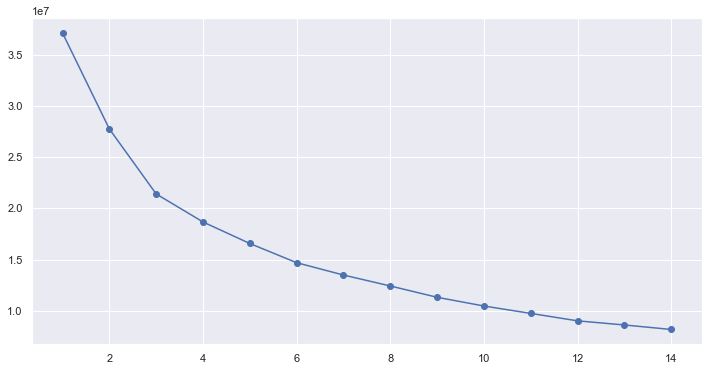

In [264]:
plt.figure(figsize=(12,6))
plt.plot( concrete_df_cluster.num_clusters, concrete_df_cluster.cluster_errors, marker="o" )

In [265]:
model_kmeans = KMeans(n_clusters=7, random_state=1)
model_kmeans.fit(concrete_df_z)

KMeans(n_clusters=7, random_state=1)

In [266]:
model_kmeans_predicted = model_kmeans.predict(concrete_df_z)

concrete_df_z_group = concrete_df_z.copy(deep = True)
concrete_df_z_group["GROUP"] = model_kmeans_predicted

In [267]:
centroid = model_kmeans.cluster_centers_
centroids

array([[ 2.28029524e+02,  4.19047619e-01,  9.87266667e+01,
         1.75128571e+02,  7.47333333e+00,  9.62698095e+02,
         8.78178095e+02,  3.72952381e+01,  2.87048571e+01],
       [ 3.47438028e+02,  1.78735211e+02, -7.10542736e-15,
         1.73539437e+02,  1.03380282e+01,  9.14239437e+02,
         7.65246479e+02,  3.39295775e+01,  5.46653521e+01],
       [ 2.33311321e+02,  1.43594340e+02,  6.93396226e+00,
         1.77322642e+02,  4.53018868e+00,  1.03507547e+03,
         7.62675472e+02,  2.97358491e+01,  3.42128302e+01],
       [ 1.56205714e+02,  1.49370000e+02,  1.33437143e+02,
         1.87912857e+02,  8.56000000e+00,  9.16988571e+02,
         7.30480000e+02,  3.06142857e+01,  3.14908571e+01],
       [ 1.49989189e+02,  1.73301351e+02, -7.10542736e-15,
         1.92571622e+02,  1.76756757e+00,  9.45547297e+02,
         8.35785135e+02,  3.08108108e+01,  2.31190541e+01],
       [ 2.05503049e+02,  1.44329268e+01,  1.39443293e+02,
         1.69339634e+02,  8.57073171e+00,  1.044778

In [268]:
concrete_df_centroid = pd.DataFrame(centroids, columns=list(concrete_df))
concrete_df_centroid

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,228.029524,4.190476e-01,9.872667e+01,175.128571,7.473333,962.698095,878.178095,37.295238,28.704857
1,347.438028,1.787352e+02,-7.105427e-15,173.539437,10.338028,914.239437,765.246479,33.929577,54.665352
2,233.311321,1.435943e+02,6.933962e+00,177.322642,4.530189,1035.075472,762.675472,29.735849,34.212830
3,156.205714,1.493700e+02,1.334371e+02,187.912857,8.560000,916.988571,730.480000,30.614286,31.490857
4,149.989189,1.733014e+02,-7.105427e-15,192.571622,1.767568,945.547297,835.785135,30.810811,23.119054
5,205.503049,1.443293e+01,1.394433e+02,169.339634,8.570732,1044.778049,778.258537,38.786585,31.945610
6,444.201754,8.305263e+01,-7.105427e-15,151.289474,12.533333,869.877193,852.614035,35.526316,55.211754
7,459.456522,1.602609e+01,7.182609e+01,186.478261,6.267391,910.004348,700.184783,27.913043,45.395217
8,320.458442,1.421085e-14,-1.421085e-14,186.389610,0.324675,1071.937662,778.694805,21.857143,24.572208
9,336.471429,2.836735e+00,1.348980e+01,189.051020,2.112245,965.877551,818.975510,32.081633,30.092143


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000132DC519088>,
      dtype=object)

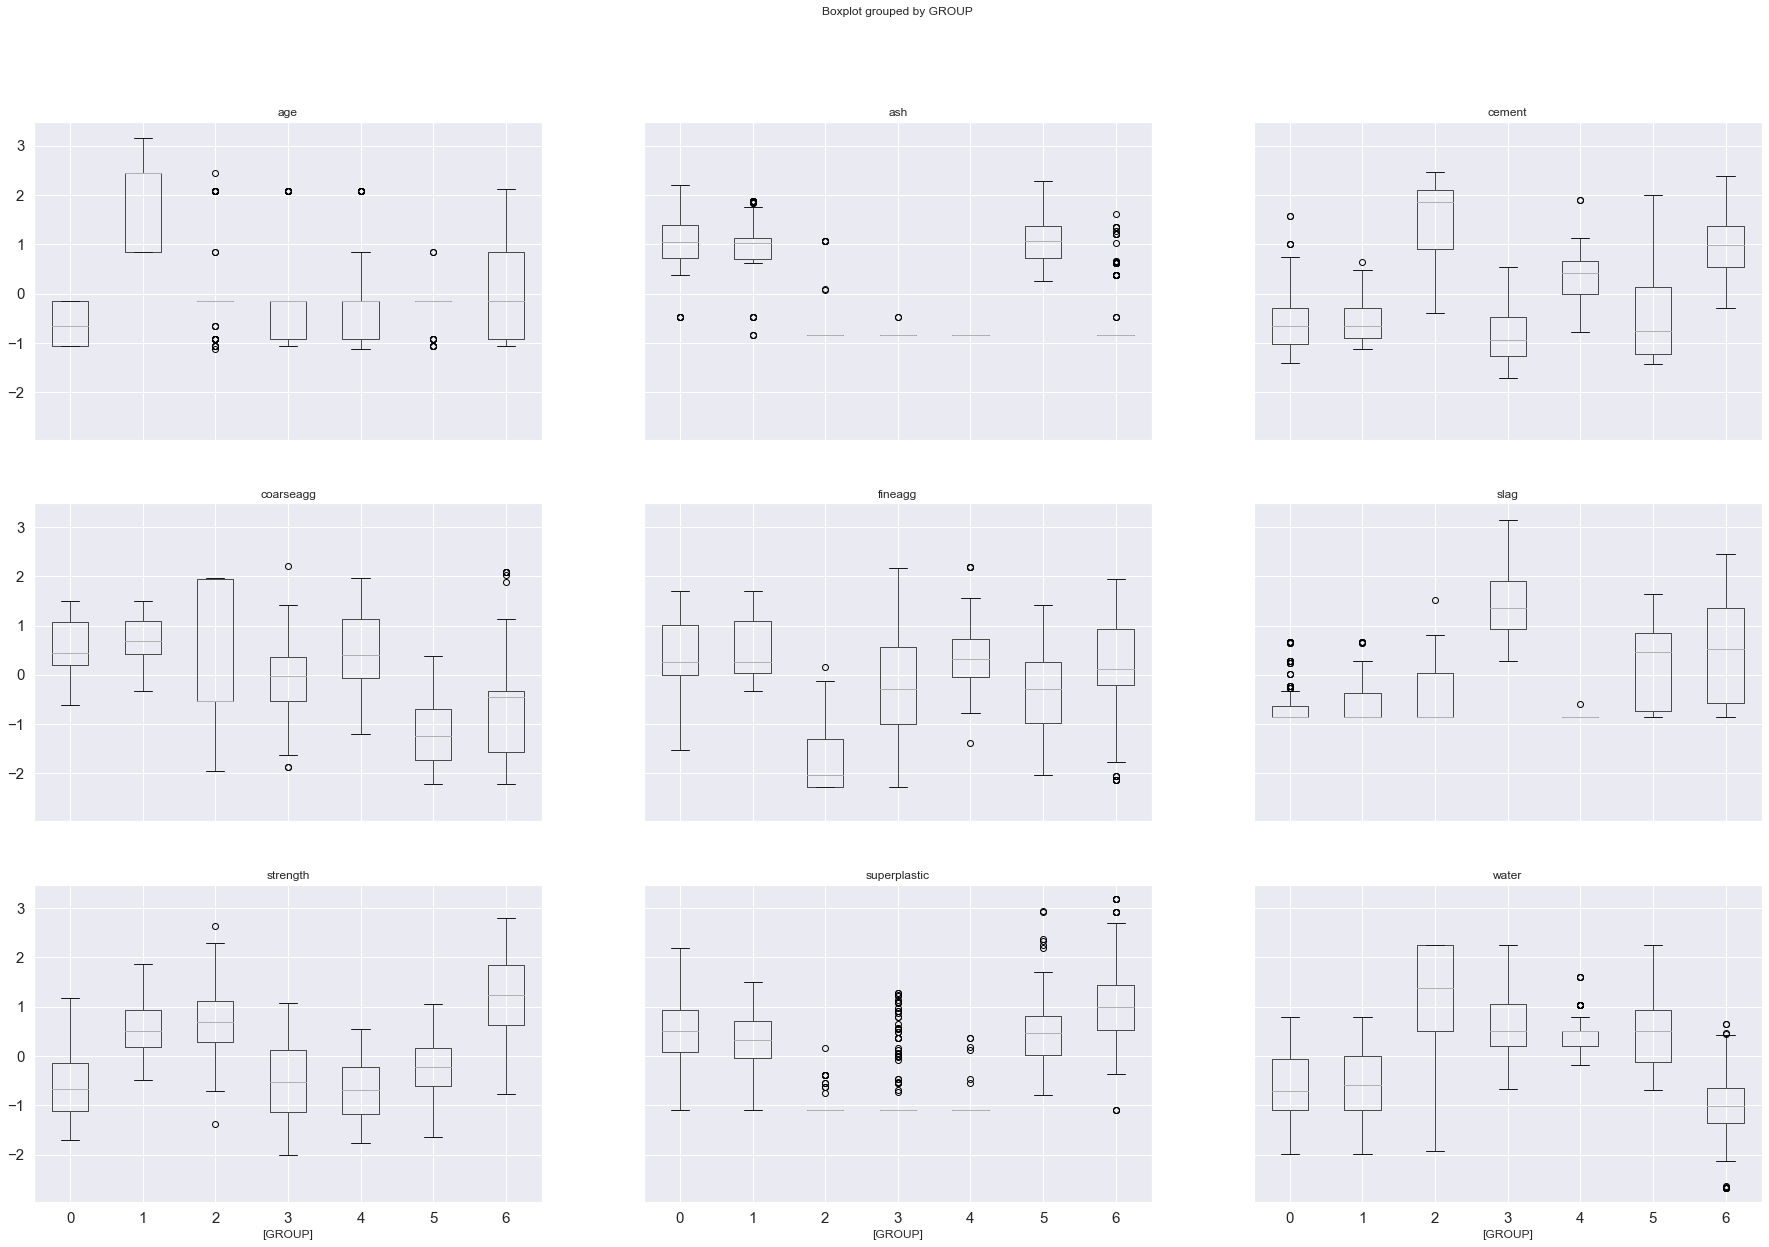

In [269]:
# visual analysis of centroids
concrete_df_z_group.boxplot(by='GROUP', fontsize=15, layout=(3,3), figsize=(30,20))

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
No distinct clusters are visible at any number of clusters. Looks like the attributes are weak predictors except for cement. The potential of getting better results by breaking data into clusters is unlikely to give the desired result
</font>

## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Deliverable - 3 (Create the Model)
<font color=darkblue>
</font>

In [270]:
X_Indepenent = concrete_df_z.drop(['strength'], axis=1)
Y_Target = concrete_df_z[['strength']]

X_train, X_test, y_train, y_test = train_test_split(X_Indepenent, Y_Target, test_size=0.3, random_state=1)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Random Forest :
<font color=darkblue>
</font>

In [271]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [272]:
model_rf_y_predicted = model_rf.predict(X_test)
model_rf_score_train = model_rf.score(X_train, y_train)
model_rf_score_test = model_rf.score(X_test, y_test)
model_rf_accuracy = metrics.r2_score(y_test, model_rf_y_predicted)
model_rf_mse = metrics.mean_squared_error(y_test, model_rf_y_predicted)

In [273]:
print('Performance on Training Data using RF : ', model_rf_score_train)
print('Performance on Test Data using RF : ', model_rf_score_test)
print('Accuracy RF : ', model_rf_accuracy)
print('Mean Squared Error RF : ', model_rf_mse)

Performance on Training Data using RF :  0.9792984842320255
Performance on Test Data using RF :  0.9025379470659638
Accuracy RF :  0.9025379470659638
Mean Squared Error RF :  0.1017367572248108


In [274]:
model_results_temp = pd.DataFrame({'Method':['Random Forest'], 'accuracy': model_rf_accuracy}, index=['7'])
model_results = pd.concat([model_results, model_results_temp])
model_results = model_results[['Method', 'accuracy']]
model_results

,Method,accuracy
1,Decision Tree,0.851227
2,Decision Tree K Fold,0.869698
3,Decision Tree Iteration 2,0.830104
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree K Fold,0.674552
6,Pruned Decision Tree Iteration 2,0.663468
7,Random Forest,0.902538


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">K Fold Cross Validation : (on Random Forest)
<font color=darkblue>
</font>

In [275]:
num_folds = 18
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
model_rf_kfold = cross_val_score(model_rf, X_Indepenent, Y_Target, cv=kfold)
model_rf_kfold_accuracy = np.mean(abs(model_rf_kfold))

In [276]:
print('Average Accuracy : ', model_rf_kfold_accuracy)
print('Standard Deviation : ', model_rf_kfold.std())

Average Accuracy :  0.9128736126425085
Standard Deviation :  0.02997972307502529


In [277]:
model_results_temp = pd.DataFrame({'Method':['Random Forest K Fold'], 'accuracy': model_rf_kfold_accuracy}, index=['8'])
model_results = pd.concat([model_results, model_results_temp])
model_results = model_results[['Method', 'accuracy']]
model_results

,Method,accuracy
1,Decision Tree,0.851227
2,Decision Tree K Fold,0.869698
3,Decision Tree Iteration 2,0.830104
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree K Fold,0.674552
6,Pruned Decision Tree Iteration 2,0.663468
7,Random Forest,0.902538
8,Random Forest K Fold,0.912874


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Gradient Boosting Regressor :
<font color=darkblue>
</font>

In [278]:
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [279]:
model_gb_y_predicted = model_gb.predict(X_test)
model_gb_score_train = model_gb.score(X_train, y_train)
model_gb_score_test = model_gb.score(X_test, y_test)
model_gb_accuracy = metrics.r2_score(y_test, model_gb_y_predicted)
model_gb_mse = metrics.mean_squared_error(y_test, model_gb_y_predicted)

In [280]:
print('Performance on Training Data using GB : ', model_gb_score_train)
print('Performance on Test Data using GB : ', model_gb_score_test)
print('Accuracy GB : ', model_gb_accuracy)
print('Mean Squared Error GB : ', model_gb_mse)

Performance on Training Data using GB :  0.9430469892492805
Performance on Test Data using GB :  0.8927928560900209
Accuracy GB :  0.8927928560900209
Mean Squared Error GB :  0.11190926975565411


In [281]:
model_results_temp = pd.DataFrame({'Method':['Gradient Boosting'], 'accuracy': model_gb_accuracy}, index=['9'])
model_results = pd.concat([model_results, model_results_temp])
model_results = model_results[['Method', 'accuracy']]

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">K Fold Cross Validation : (on Gradient Boosting)
<font color=darkblue>
</font>

In [282]:
num_folds = 18
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
model_gb_kfold = cross_val_score(model_gb, X_Indepenent, Y_Target, cv=kfold)
model_gb_kfold_accuracy = np.mean(abs(model_gb_kfold))

In [283]:
print('Average Accuracy : ', model_gb_kfold_accuracy)
print('Standard Deviation : ', model_gb_kfold.std())

Average Accuracy :  0.8984987406877565
Standard Deviation :  0.025944459900541162


In [284]:
model_results_temp = pd.DataFrame({'Method':['Gradient Boosting K Fold'], 'accuracy': model_gb_kfold_accuracy}, index=['10'])
model_results = pd.concat([model_results, model_results_temp])
model_results = model_results[['Method', 'accuracy']]

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Ada Boosting Regressor :
<font color=darkblue>
</font>

In [285]:
model_ab = AdaBoostRegressor()
model_ab.fit(X_train, y_train)

AdaBoostRegressor()

In [286]:
model_ab_y_predicted = model_ab.predict(X_test)
model_ab_score_train = model_ab.score(X_train, y_train)
model_ab_score_test = model_ab.score(X_test, y_test)
model_ab_accuracy = metrics.r2_score(y_test, model_ab_y_predicted)
model_ab_mse = metrics.mean_squared_error(y_test, model_ab_y_predicted)

In [287]:
print('Performance on Training Data using RF : ', model_ab_score_train)
print('Performance on Test Data using RF : ', model_ab_score_test)
print('Accuracy RF : ', model_ab_accuracy)
print('Mean Squared Error RF : ', model_ab_mse)

Performance on Training Data using RF :  0.8235823782273336
Performance on Test Data using RF :  0.769285049417102
Accuracy RF :  0.769285049417102
Mean Squared Error RF :  0.2408341524621162


In [288]:
model_results_temp = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'accuracy': model_ab_accuracy}, index=['11'])
model_results = pd.concat([model_results, model_results_temp])
model_results = model_results[['Method', 'accuracy']]

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">K Fold Cross Validation : (on Ada Boosting)
<font color=darkblue>
</font>

In [289]:
num_folds = 18
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
model_ab_kfold = cross_val_score(model_ab, X_Indepenent, Y_Target, cv=kfold)
model_ab_kfold_accuracy = np.mean(abs(model_ab_kfold))

In [290]:
print('Average Accuracy : ', model_ab_kfold_accuracy)
print('Standard Deviation : ', model_ab_kfold.std())

Average Accuracy :  0.7749003711486443
Standard Deviation :  0.03684611027532094


In [291]:
model_results_temp = pd.DataFrame({'Method':['Ada Boosting Regressor K Fold'], 'accuracy': model_ab_kfold_accuracy}, index=['12'])
model_results = pd.concat([model_results, model_results_temp])
model_results = model_results[['Method', 'accuracy']]

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Bagging Regressor :
<font color=darkblue>
</font>

In [292]:
model_bagging = BaggingRegressor()
model_bagging.fit(X_train, y_train)

BaggingRegressor()

In [293]:
model_bagging_y_predicted = model_bagging.predict(X_test)
model_bagging_score_train = model_bagging.score(X_train, y_train)
model_bagging_score_test = model_bagging.score(X_test, y_test)
model_bagging_accuracy = metrics.r2_score(y_test, model_bagging_y_predicted)
model_bagging_mse = metrics.mean_squared_error(y_test, model_bagging_y_predicted)

In [294]:
print('Performance on Training Data using Bagging : ', model_bagging_score_train)
print('Performance on Test Data using Bagging : ', model_bagging_score_test)
print('Accuracy Bagging : ', model_bagging_accuracy)
print('Mean Squared Error Bagging : ', model_bagging_mse)

Performance on Training Data using Bagging :  0.9666444939440163
Performance on Test Data using Bagging :  0.8891740760536736
Accuracy Bagging :  0.8891740760536736
Mean Squared Error Bagging :  0.11568677017683893


In [295]:
model_results_temp = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': model_bagging_accuracy}, index=['13'])
model_results = pd.concat([model_results, model_results_temp])
model_results = model_results[['Method', 'accuracy']]

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">K Fold Cross Validation : (on Bagging)
<font color=darkblue>
</font>

In [296]:
num_folds = 18
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
model_bagging_kfold = cross_val_score(model_bagging, X_Indepenent, Y_Target, cv=kfold)
model_bagging_kfold_accuracy = np.mean(abs(model_bagging_kfold))

In [297]:
print('Average Accuracy : ', model_bagging_kfold_accuracy)
print('Standard Deviation : ', model_bagging_kfold.std())

Average Accuracy :  0.9040830364306623
Standard Deviation :  0.028317983301229154


In [298]:
model_results_temp = pd.DataFrame({'Method':['Bagging Regressor K Fold'], 'accuracy': model_bagging_kfold_accuracy}, index=['14'])
model_results = pd.concat([model_results, model_results_temp])
model_results = model_results[['Method', 'accuracy']]

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">KNN Regressor :
<font color=darkblue>
</font>

In [299]:
ac_scores=[]
for i in range(1,30):
    model_knn = KNeighborsRegressor(n_neighbors=i)
    model_knn.fit(X_train,y_train)
    pred_i = model_knn.predict(X_test)
    ac_scores.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

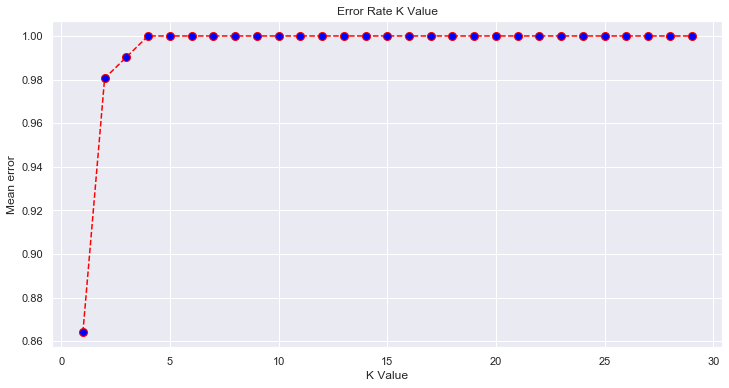

In [300]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),ac_scores, color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=8)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [301]:
model_knn = KNeighborsRegressor(n_neighbors=3)
model_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [302]:
model_knn_y_predicted = model_knn.predict(X_test)
model_knn_score_train = model_knn.score(X_train, y_train)
model_knn_score_test = model_knn.score(X_test, y_test)
model_knn_accuracy = metrics.r2_score(y_test, model_knn_y_predicted)
model_knn_mse = metrics.mean_squared_error(y_test, model_knn_y_predicted)

In [303]:
print('Performance on Training Data using RF : ', model_knn_score_train)
print('Performance on Test Data using RF : ', model_knn_score_test)
print('Accuracy RF : ', model_knn_accuracy)
print('Mean Squared Error RF : ', model_knn_mse)

Performance on Training Data using RF :  0.8902196318573777
Performance on Test Data using RF :  0.8078817663272165
Accuracy RF :  0.8078817663272165
Mean Squared Error RF :  0.20054457616295157


In [304]:
model_results_temp = pd.DataFrame({'Method':['KNN Regressor'], 'accuracy': model_knn_accuracy}, index=['15'])
model_results = pd.concat([model_results, model_results_temp])
model_results = model_results[['Method', 'accuracy']]

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">K Fold Cross Validation : (on KNN)
<font color=darkblue>
</font>

In [305]:
num_folds = 18
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
model_knn_kfold = cross_val_score(model_rf, X_Indepenent, Y_Target, cv=kfold)
model_knn_kfold_accuracy = np.mean(abs(model_knn_kfold))

In [306]:
print('Average Accuracy : ', model_knn_kfold_accuracy)
print('Standard Deviation : ', model_knn_kfold.std())

Average Accuracy :  0.9128073060990608
Standard Deviation :  0.030377532247594454


In [307]:
model_results_temp = pd.DataFrame({'Method':['KNN Regressor K Fold'], 'accuracy': model_knn_kfold_accuracy}, index=['16'])
model_results = pd.concat([model_results, model_results_temp])
model_results = model_results[['Method', 'accuracy']]

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Support Vector Regressor :
<font color=darkblue>
</font>

In [308]:
model_svr = SVR(kernel='linear')
model_svr.fit(X_train, y_train)

SVR(kernel='linear')

In [309]:
model_svr_y_predicted = model_svr.predict(X_test)
model_svr_score_train = model_svr.score(X_train, y_train)
model_svr_score_test = model_svr.score(X_test, y_test)
model_svr_accuracy = metrics.r2_score(y_test, model_svr_y_predicted)
model_svr_mse = metrics.mean_squared_error(y_test, model_svr_y_predicted)

In [310]:
print('Performance on Training Data using RF : ', model_svr_score_train)
print('Performance on Test Data using RF : ', model_svr_score_test)
print('Accuracy RF : ', model_svr_accuracy)
print('Mean Squared Error RF : ', model_svr_mse)

Performance on Training Data using RF :  0.7195312919938222
Performance on Test Data using RF :  0.6932035001931365
Accuracy RF :  0.6932035001931365
Mean Squared Error RF :  0.32025265299303374


In [311]:
model_results_temp = pd.DataFrame({'Method':['Support Vector Regressor'], 'accuracy': model_svr_accuracy}, index=['17'])
model_results = pd.concat([model_results, model_results_temp])
model_results = model_results[['Method', 'accuracy']]

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">K Fold Cross Validation : (on SVR)
<font color=darkblue>
</font>

In [312]:
num_folds = 18
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
model_svr_kfold = cross_val_score(model_svr, X_Indepenent, Y_Target, cv=kfold)
model_svr_kfold_accuracy = np.mean(abs(model_svr_kfold))

In [313]:
print('Average Accuracy : ', model_svr_kfold_accuracy)
print('Standard Deviation : ', model_svr_kfold.std())

Average Accuracy :  0.6936874081465813
Standard Deviation :  0.0717545191117263


In [314]:
model_results_temp = pd.DataFrame({'Method':['Support Vector Regressor K Fold'], 'accuracy': model_svr_kfold_accuracy}, index=['18'])
model_results = pd.concat([model_results, model_results_temp])
model_results = model_results[['Method', 'accuracy']]

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Ensemble (KNN Regressor, SVR, Linear Regression) :
<font color=darkblue>
</font>

In [315]:
LR = LinearRegression()
KNN = KNeighborsRegressor()
SVR = SVR(kernel='linear')

In [316]:
model_ensemble = VotingRegressor(estimators=[('LR',LR), ('KNN',KNN), ('SVR', SVR)])
model_ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KNN', KNeighborsRegressor()),
                            ('SVR', SVR(kernel='linear'))])

In [317]:
model_ensemble_y_predicted = model_ensemble.predict(X_test)
model_ensemble_score_train = model_ensemble.score(X_train, y_train)
model_ensemble_score_test = model_ensemble.score(X_test, y_test)
model_ensemble_accuracy = metrics.r2_score(y_test, model_ensemble_y_predicted)
model_ensemble_mse = metrics.mean_squared_error(y_test, model_ensemble_y_predicted)

In [318]:
print('Performance on Training Data using RF : ', model_ensemble_score_train)
print('Performance on Test Data using RF : ', model_ensemble_score_test)
print('Accuracy RF : ', model_ensemble_accuracy)
print('Mean Squared Error RF : ', model_ensemble_mse)

Performance on Training Data using RF :  0.8019230389787326
Performance on Test Data using RF :  0.7685908169025832
Accuracy RF :  0.7685908169025832
Mean Squared Error RF :  0.24155883414756116


In [319]:
model_results_temp = pd.DataFrame({'Method':['Ensemble Regressor'], 'accuracy': model_ensemble_accuracy}, index=['19'])
model_results = pd.concat([model_results, model_results_temp])
model_results = model_results[['Method', 'accuracy']]
model_results

,Method,accuracy
1,Decision Tree,0.851227
2,Decision Tree K Fold,0.869698
3,Decision Tree Iteration 2,0.830104
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree K Fold,0.674552
6,Pruned Decision Tree Iteration 2,0.663468
7,Random Forest,0.902538
8,Random Forest K Fold,0.912874
9,Gradient Boosting,0.892793
10,Gradient Boosting K Fold,0.898499


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">K Fold Cross Validation : (on Ensemble)
<font color=darkblue>
</font>

In [320]:
num_folds = 18
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
model_ensemble_kfold = cross_val_score(model_ensemble, X_Indepenent, Y_Target, cv=kfold)
model_ensemble_kfold_accuracy = np.mean(abs(model_ensemble_kfold))

In [321]:
print('Average Accuracy : ', model_ensemble_kfold_accuracy)
print('Standard Deviation : ', model_ensemble_kfold.std())

Average Accuracy :  0.7699244842106743
Standard Deviation :  0.05196128436901143


In [322]:
model_results_temp = pd.DataFrame({'Method':['Ensemble Regressor K Fold'], 'accuracy': model_ensemble_kfold_accuracy}, index=['20'])
model_results = pd.concat([model_results, model_results_temp])
model_results = model_results[['Method', 'accuracy']]
model_results

,Method,accuracy
1,Decision Tree,0.851227
2,Decision Tree K Fold,0.869698
3,Decision Tree Iteration 2,0.830104
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree K Fold,0.674552
6,Pruned Decision Tree Iteration 2,0.663468
7,Random Forest,0.902538
8,Random Forest K Fold,0.912874
9,Gradient Boosting,0.892793
10,Gradient Boosting K Fold,0.898499


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>On applying all the models we observe Random Forest Regressor, Random Forest Regressor k fold, Gradient Boost Regressor, Gradient Boost Regressor k fold, Bagging Regressor models give us the better results as compared to other models</li>
<li>It is clear that ensemble models are better choice for this problem</li>
<li>With dataset having different gaussians, k means clustering can be applied on the models and compare the accuracy</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Accuracy of models on Featured DataFrame : 
<font color=darkblue>
</font>

In [323]:
concrete_df_feat.head()

,cement,slag,fineagg,feat_1,feat_2,feat_7,feat_10,feat_11,feat_12,feat_13,...,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129
0,141.3,212.0,748.5,141.3,212.0,748.5,29955.60,0.00,28754.55,0.00,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036
1,168.9,42.2,796.2,168.9,42.2,796.2,7127.58,20994.27,26736.87,1824.12,...,9293755.968,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655
2,250.0,0.0,861.2,250.0,0.0,861.2,0.00,23925.00,46850.00,1375.00,...,4532452.540,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560
3,266.0,114.0,670.0,266.0,114.0,670.0,30324.00,0.00,60648.00,0.00,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000
4,154.8,183.4,696.7,154.8,183.4,696.7,28390.32,0.00,29922.84,1408.68,...,6640484.578,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382


In [324]:
X_Indepenent = concrete_df_feat
Y_Target = concrete_df[['strength']]

X_train, X_test, y_train, y_test = train_test_split(X_Indepenent, Y_Target, test_size=0.3, random_state=1)

In [325]:
pipelines = []
pipelines.append(('KNN Regressor',Pipeline([('scaler',RobustScaler()),('KNNR',KNeighborsRegressor())])))
pipelines.append(('DecisionTreeRegressor',Pipeline([('scaler',RobustScaler()),('DTR',DecisionTreeRegressor())])))
pipelines.append(('AdaboostRegressor',Pipeline([('scaler',RobustScaler()),('ABR',AdaBoostRegressor())])))
pipelines.append(('RandomForestRegressor',Pipeline([('scaler',RobustScaler()),('RBR',RandomForestRegressor())])))
pipelines.append(('BaggingRegressor',Pipeline([('scaler',RobustScaler()),('BGR',BaggingRegressor())])))
pipelines.append(('GradientBoostRegressor',Pipeline([('scaler',RobustScaler()),('GBR',GradientBoostingRegressor())])))


In [326]:
concrete_df_result_train = pd.DataFrame({'Regressor':[],'ExplVarianceScore':[],'StdDev':[]})

for ind, val in enumerate(pipelines):
    name, pipeline = val
    kfold = KFold(n_splits=10,random_state=1) 
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='explained_variance')
    concrete_df_result_train.loc[ind] = [name,cv_results.mean()*100,cv_results.std()*100]

# Let's check the training results with raw features  as well as new features
concrete_df_result_train

,Regressor,ExplVarianceScore,StdDev
0,KNN Regressor,72.083962,6.354919
1,DecisionTreeRegressor,80.627088,3.133960
2,AdaboostRegressor,82.202516,2.638468
3,RandomForestRegressor,88.655260,2.313315
4,BaggingRegressor,87.266608,2.812690
5,GradientBoostRegressor,89.811558,2.250892


In [327]:
concrete_df_result_test = pd.DataFrame({'Regressor':[],'ExplVarianceScore':[]})

for ind, val in enumerate(pipelines):
    name, pipeline = val
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    concrete_df_result_test.loc[ind] = [name,explained_variance_score(y_test,y_pred)*100]

# Let's check the test results with raw features  as well as new features
concrete_df_result_test

,Regressor,ExplVarianceScore
0,KNN Regressor,75.602659
1,DecisionTreeRegressor,85.495535
2,AdaboostRegressor,83.250110
3,RandomForestRegressor,91.361611
4,BaggingRegressor,90.357143
5,GradientBoostRegressor,91.738897


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
It is observed as using the feature engineered dataframe does not show any significant improvement in performance of ML models
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Feature Importance by Ensemble Models : 
<font color=darkblue>
</font>

In [328]:
X_Indepenent = concrete_df.drop(['strength'], axis=1)
Y_Target = concrete_df[['strength']]

X_train, X_test, y_train, y_test = train_test_split(X_Indepenent, Y_Target, test_size=0.3, random_state=1)

In [329]:
pipe_rf = Pipeline([('scaler',RobustScaler()),('RBR',RandomForestRegressor())])
pipe_br = Pipeline([('scaler',RobustScaler()),('BGR',BaggingRegressor())])
pipe_gbr = Pipeline([('scaler',RobustScaler()),('GBR',GradientBoostingRegressor())])

# Initalize the empty dataframes to capture the feature importances given by these models..
df_featImp_rf = df_featImp_br = df_featImp_gbr = pd.DataFrame({'Features':[], 'Importance':[]})

In [330]:
# feature importance given by Random Forest Regressor
pipe_rf.fit(X_train, y_train)
featImp_rf = pipe_rf.steps[1][1].feature_importances_

df_featImp_rf['Features'] = X_train.columns
df_featImp_rf['Importance'] = featImp_rf

# Feature importance given by Random Forest Regressor
df_featImp_rf.sort_values(by='Importance', ascending=False)

,Features,Importance
7,age,0.337620
0,cement,0.326096
3,water,0.131670
1,slag,0.070476
4,superplastic,0.042747
6,fineagg,0.037567
5,coarseagg,0.030551
2,ash,0.023273


In [331]:
# feature importance given by Gradient Boost Regressor
pipe_gbr.fit(X_train,y_train)
featImp_gbr = pipe_gbr.steps[1][1].feature_importances_

df_featImp_gbr['Features'] = X_train.columns
df_featImp_gbr['Importance'] = featImp_gbr

# Feature importance given by Gradient Boost Regressor
df_featImp_gbr.sort_values(by='Importance', ascending=False)

,Features,Importance
7,age,0.369683
0,cement,0.326893
3,water,0.131865
1,slag,0.089170
4,superplastic,0.034205
6,fineagg,0.023471
5,coarseagg,0.013165
2,ash,0.011549


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>We can see the difference in feature importance by random forest and gradient boost regressor</li>
<li>age and cement attributes are most important to predict concrete strength</li>
<li>ash attibute is the weakest of all</li>
</ul>
</font>

## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Deliverable - 4 (Tuning the Model)
<font color=darkblue>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Algorithms suitable for this project
<font color=darkblue>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Target variable strength is highly non-linear function of independent variables, any algorithm which captures this non-linear relashionship is good here</li>
<li>Basic models applicable for this problem can be linear regression with polynomial features of degree d with d>1. ie models with nonlinear kernels such as support vector regressor, random forest</li>
<li>Decision tree regression model is also suitable since it can also capture nonlinearity. However random forest regression would be more effective.</li>
<li>Finally, ensemble regression models which consist of multiple models which either work parallely or sequentially to give final output</li>
</ul>
<br>
Based on above results, we observe ensemble based regression models gradient boost regressor, bagging regressor and random forest regressor are most effective for this problem and we will tune the gradient boosting model (best performing) to squeeze the extra performance out of it.
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Techniques to squeeze extra performance
<font color=darkblue>
We will make use of GridSearchCV and RandomSearchCV functions to find the best model parameters by tuning the hyper parameters
</font>

In [332]:
X_Indepenent = concrete_df.drop(['strength'], axis=1)
Y_Target = concrete_df[['strength']]

X_train, X_test, y_train, y_test = train_test_split(X_Indepenent, Y_Target, test_size=0.3, random_state=1)

In [333]:
pipe_gbr = Pipeline([('scaler',RobustScaler()),('GBR',GradientBoostingRegressor())])

In [334]:
pipe_gbr.steps[1][1]

GradientBoostingRegressor()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Using GridSearchCV
<font color=darkblue>
</font>

In [335]:
param_grid={'GBR__n_estimators':[100,500,1000], 'GBR__learning_rate': [0.1,0.05,0.02,0.01], 'GBR__max_depth':[4,6], 
            'GBR__min_samples_leaf':[3,5,9,17], 'GBR__max_features':[1.0,0.3,0.1] }


In [336]:
model_gs = GridSearchCV(pipe_gbr, param_grid=param_grid, cv=5, scoring='explained_variance', n_jobs=-1)
model_gs.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('GBR', GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'GBR__learning_rate': [0.1, 0.05, 0.02, 0.01],
                         'GBR__max_depth': [4, 6],
                         'GBR__max_features': [1.0, 0.3, 0.1],
                         'GBR__min_samples_leaf': [3, 5, 9, 17],
                         'GBR__n_estimators': [100, 500, 1000]},
             scoring='explained_variance')

In [337]:
print("Grid Search Best parameter (CV score=%0.3f):" % model_gs.best_score_)
print(model_gs.best_params_)

Grid Search Best parameter (CV score=0.917):
{'GBR__learning_rate': 0.05, 'GBR__max_depth': 6, 'GBR__max_features': 0.1, 'GBR__min_samples_leaf': 9, 'GBR__n_estimators': 1000}


In [338]:
model_gs_y_pred_train = model_gs.predict(X_train)
model_gs_y_pred_test = model_gs.predict(X_test)

print('Grid Search Testing Explained Variance Score is  {}'.format(explained_variance_score(y_test, model_gs_y_pred_test)))
print('Grid Search Testing R2 Score is  {}'.format(r2_score(y_test, model_gs_y_pred_test)))

Grid Search Testing Explained Variance Score is  0.9254815137132631
Grid Search Testing R2 Score is  0.9250423316267831


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Using RandomizedSearchCV
<font color=darkblue>
</font>

In [339]:
param_random={'GBR__n_estimators':[100,500,1000], 'GBR__learning_rate': [0.1,0.05,0.02,0.01], 'GBR__max_depth':[4,6], 
            'GBR__min_samples_leaf':[3,5,9,17], 'GBR__max_features':[1.0,0.3,0.1] }


In [340]:
model_rs = RandomizedSearchCV(estimator=pipe_gbr, param_distributions=param_random, n_iter=5, 
                              cv=5, scoring='explained_variance', n_jobs=-1)
model_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                             ('GBR',
                                              GradientBoostingRegressor())]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'GBR__learning_rate': [0.1, 0.05, 0.02,
                                                               0.01],
                                        'GBR__max_depth': [4, 6],
                                        'GBR__max_features': [1.0, 0.3, 0.1],
                                        'GBR__min_samples_leaf': [3, 5, 9, 17],
                                        'GBR__n_estimators': [100, 500, 1000]},
                   scoring='explained_variance')

In [341]:
print("Best parameter (CV score=%0.3f):" % model_rs.best_score_)
print(model_rs.best_params_)


Best parameter (CV score=0.912):
{'GBR__n_estimators': 1000, 'GBR__min_samples_leaf': 17, 'GBR__max_features': 0.3, 'GBR__max_depth': 4, 'GBR__learning_rate': 0.05}


In [342]:
model_rs_y_pred_train = model_rs.predict(X_train)
model_rs_y_pred_test = model_rs.predict(X_test)

print('Randomized Search Testing Explained Variance Score is  {}'.format(explained_variance_score(y_test, model_rs_y_pred_test)))
print('Randomized Search Testing R2 Score is  {}'.format(r2_score(y_test, model_rs_y_pred_test)))

Randomized Search Testing Explained Variance Score is  0.9222692781041564
Randomized Search Testing R2 Score is  0.921505289914264


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Using GridSearchCV based model tuning the training and test scores (explained variance) are about 92.6%
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Bootstrap Sampling
<font color=darkblue>
</font>

In [343]:
values = concrete_df.values

# Number of bootstrap samples to create
n_iterations = 1000        

# size of a bootstrap sample
n_size = int(len(concrete_df_z) * 1)    

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Bootstrap Sampling - Using Gradient Boosing Regressor
<font color=darkblue>
</font>

In [344]:
# run bootstrap
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  
    # picking rest of the data not considered in sample
    
    # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)

    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 

    # Take the target column for all rows in test set
    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)

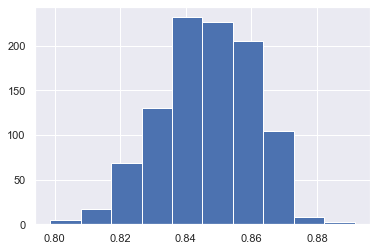

95.0 confidence interval 81.8% and 87.1%


In [345]:
# plot scores
#from matplotlib import pyplot
plt.hist(stats)
plt.show()

# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))

print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>The bootstrap Gradient Boosting model performance is between 81.6%-87.0% </li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Bootstrap Sampling - using Random Forest Regressor
<font color=darkblue>
</font>

In [346]:
# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  
    # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)

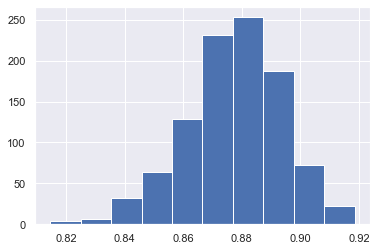

95.0 confidence interval 84.2% and 90.7%


In [347]:
# plot scores
plt.hist(stats)
plt.show()

# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))

print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>The bootstrap random forest classification model performance is between 84%-90.8% which is better than other model</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Conclusion :
<font color=darkblue>
<ul>
<li>Objective is to identify model for high performance concrete strength</li>
<li>Dataset had outliers which were identified and replaced with respective median values</li>
<li>We tried different Regression Models. Decision Tree, Random Forest, Gradient Boosting, Ada Boosting, Bagging, KNN, Support Vector Regressor and Ensemble</li>
<li>We also tried K Fold on above models, tried Pruned Decision Tree model</li>
<li>Of all the models, Random Forest regression gives better accuracy than other models</li>
<li>We also tried adding composite feature and explored gaussians</li>
</ul>
</font>